Notice that the line selection is essentially random. Initially I wnated to select the most monotonic traces. However there was an error and other lines are selected. It is ok, it looks good like this. 

In [2]:
import sys,os
sys.path.append("../../../work2/ownutils/scriptssyn/") #update path accordingly
sys.path.append('./bin/')
#sys.path.append('./cflinux/')
import PolAB_A_allpars
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from basic import compute_synergy as compute_synergyb
import fluxes
import matplotlib.colors as colors

In [3]:
folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-kinsynsub1/2020_08_05_ku_samebasal/results"
#there are the results of two runs, as indicated by the date of the files. the second one was allowed to run for longer and for more points per npt1, so there are more points
#here I am using the results of the second run
files=os.listdir(folder)
len(files)

200

In [4]:
classes_to_drop=["zeros","zerod","zeroi","nan",np.NaN]

In [5]:
green="#c6cdad"
blue="#d3dbe4"
red="#e3cbc8"

In [5]:
allkufactors=np.logspace(0.1,10,50)
alldfs=[]
n=0
ids=[]
for f in files:
    if "20200813" in f:
        try:
            df=pd.read_csv(os.path.join(folder,f))
            #print(df.columns)

        except:
            pass
        npt1=max(df["npt1"]) #at most, how many basal parameter sets were tested in this job. Notice that some npt1 may be missing if no npt2 was found to fulfill all the constraints

        df["name"]=f.split("_")[-1].split(".")[0]

        if npt1>0:
            df=df[df["npt1"]<npt1] #do not choose the last one in case it didn't finish
            df["id"]=df["name"]+"-"+df["npt1"].astype(str) #["%s-%s"%(xy[0],xy[1]) for xy in zip(df["name"].values,df["npt1"].values)] #filenameid-pt0id
            alldfs.append(df)
alldfs=pd.concat(alldfs)
df=alldfs
print("total npt1 (id):", len(df["id"].unique()))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


total npt1 (id): 859


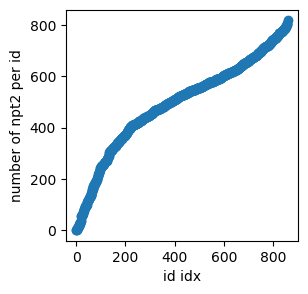

In [6]:
ids=df.groupby("id")["npt2"].unique().explode().index.values #each id is present as many times as npt2 for that id
ids,counts=np.unique(ids,return_counts=True)
argsort=np.argsort(counts)
plt.figure(figsize=(3,3))
plt.scatter(np.arange(len(ids)),counts[argsort])
plt.xlabel("id idx")
plt.ylabel("number of npt2 per id")
plt.show()

Notice how for the majority of ids, at least 200 npt2 were found.
The rest up to 1000 that were not saved correspond to parameter sets for which there is no significant change in synergy.

In [7]:
df.columns

Index(['npt1', 'npt2', 'class', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7',
       'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17',
       'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'synab_0.1', 'synab_0.16681',
       'synab_0.278256', 'synab_0.464159', 'synab_0.774264', 'synab_1.29155',
       'synab_2.15443', 'synab_3.59381', 'synab_5.99484', 'synab_10',
       'synba_0.1', 'synba_0.16681', 'synba_0.278256', 'synba_0.464159',
       'synba_0.774264', 'synba_1.29155', 'synba_2.15443', 'synba_3.59381',
       'synba_5.99484', 'synba_10', 'name', 'id'],
      dtype='object')

In [8]:
mpl.rcParams["font.size"]=12
def tint_ax(ax):
    xmin,xmax=ax.get_xlim()
    ymin,ymax=ax.get_ylim()
    if xmax>0:
        ax.fill_between([0,xmax],ymax,color=green,zorder=1)
    if xmin<0:
        ax.fill_between([xmin,0],ymax,color=blue,zorder=1)
        ax.fill_between([xmin,0],ymin,color=red,zorder=1)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    return ax

rhofunc=PolAB_A_allpars.interface_rhos_GRF_PolAB_A_A
parsliststr='ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA,ktiaB,ktanB,ktinB,ktniB,kbBa,kuBa,kbBi,kuBi,kbBn,kuBn,kbAa,kuAa,kbAi,kuAi,kbAn,kuAn'
parslist=parsliststr.split(',')
parslist_order=['ktni0','ktin0','ktia0','ktan0','ktniA','ktinA','ktiaA','ktanA','ktniB','ktinB','ktiaB','ktanB','kbBa','kuBa','kbBi','kuBi','kbBn','kuBn','kbAa','kuAa','kbAi','kuAi','kbAn','kuAn']
flux_order_labs=['2-1','1-2','1-0','0-2','5-4','4-5','4-3','3-5','8-7','7-8','7-6','6-8','2-5','5-2','2-8','8-2','1-4','4-1','1-7','7-1','0-3','3-0','0-6','6-0']

labls=np.array(parslist[:18])
idxs_ratios=[2,3,6,7,10,11,12,13,14,15,16,17]
idxs_noratios=[0,1,4,5,8,9]
#idxs_rates=[3,2,7,6,11,10,0,4,8,1,5,9,12,13,14,15,16,17]
idxs_rates=[2,3,0,1,6,7,4,5,10,11,8,9,16,17,14,15,12,13]


edges=[(2,'ktia0',1),(1,'ktan0',3),(2,'ktin0',3),(3,'ktni0',2),
       (8,'ktiaA',7),(7,'ktanA',9),(8,'ktinA',9),(9,'ktniA',8),
       (5,'ktiaB',4),(4,'ktanB',6),(5,'ktinB',6),(6,'ktniB',5),
      (1,'kbBa-B',4),(4,'kuBa',1),(2,'kbBi-B',5),(5,'kuBi',2),(3,'kbBn-B',6),(6,'kuBn',3),
       (1,'kbAa-A',7),(7,'kuAa',1),(2,'kbAi-A',8),(8,'kuAi',2),(3,'kbAn-A',9),(9,'kuAn',3)]
edges_=[]
for tuple_ in edges:
    edges_.append((tuple_[0]-1,tuple_[1],tuple_[2]-1))
    
graph_edges_dict=dict()
for x in edges:
    graph_edges_dict['%s-%s'%(x[0],x[2])]=x[1]

#this is tha labels corresponding to the flux matrix, then flattened so that it is a row
nnodes=9
flux_names_mat=np.empty((nnodes,nnodes),dtype=object)
for i in np.arange(nnodes):
    for j in np.arange(nnodes):
        flux_names_mat[i,j]='%d-%d'%(i,j)
#print(flux_names_mat)
flux_names_flat=flux_names_mat.flatten()
#print(flux_names_flat)

#names of transitions for the fluxes, appending an extension to distinguish the different TF states
all_fnames=[]
flux_order_labs_AB=[]
for i in [3]:
    if i==0:
        ext='0'
    elif i==1:
        ext='A'
    elif i==2:
        ext='B'
    else:
        ext='AB'
    all_fnames.extend(['%s.%s'%(x,ext) for x in flux_names_flat]) #add extension to the labls obtained above
    flux_order_labs_AB.extend(['%s.%s'%(x,ext) for x in flux_order_labs]) #add extension to the order
all_fnames=np.array(all_fnames)
    
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
def makeplot(parset,getsynergiesonly=False,plotfluxesonly=False,idxtosave=None,nplotfluxes=4):
    node0=2
    fontsize=12
    cmap=truncate_colormap(plt.cm.Greys,minval=0.2,maxval=1.0)
    
    idxs=range(3)
    msizes=[120,75,40,15]
    kufactors=np.array([0.1,0.5,2.5,10])
    allkufactors=np.arange(0.1,10.0,0.05)
    
    basiccoords={0: [0,-1],
         1: [0.,1],
         2: [-1, 0]}


    dx=2.5
    coords=dict()
    coords[0]=basiccoords[0]
    coords[1]=basiccoords[1]
    coords[2]=basiccoords[2]
    coords[3]=[basiccoords[0][0]+dx,basiccoords[0][1]]
    coords[4]=[basiccoords[1][0]+dx,basiccoords[1][1]]
    coords[5]=[basiccoords[2][0]+dx,basiccoords[2][1]]
    coords[6]=[basiccoords[0][0]-dx,basiccoords[0][1]]
    coords[7]=[basiccoords[1][0]-dx,basiccoords[1][1]]
    coords[8]=[basiccoords[2][0]-dx,basiccoords[2][1]]


    #connectstyles
    connectstyle1='arc3,rad=-0.45'
    connectstyle2='arc3,rad=0.2'
    connectstyle3='arc3,rad=-0.075'
    
    #connectstylelist=[connectstyle1,connectstyle2,connectstyle3]
    #kuvalslist=[vlines_1458,vlines_1486]

    print(parset[0:4])
    print(parset[4:8])
    print(parset[8:12])
    print(parset[12],parset[13])
    A=1
    B=1
    netJ=True
    #kuvals=kuvalslist[idxnum]

    allGslist=[]
    allG2slist=[]
    allcolorslist=[]
    allkuvals=[]
    kuvals=[]
    synergies=[]
    allsynergies=[]
    
    GRFAB=[]
    GRFA=[]
    GRFB=[]
    GRF0=[]

    for i in range(len(allkufactors)): #kuvals)):
        #ku=kuvals[i]
        parset2=parset.copy()
        parset2[[13,15,17,19,21,23]]=parset[[13,15,17,19,21,23]]*allkufactors[i]
        
        allkuvals.append(parset2[13])
        syn=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A)
        allsynergies.append(syn)
        
        GRF0.append(PolAB_A_allpars.interface_GRF_PolAB_A_A(parset2,np.array([0]),0))
        GRFAB.append(PolAB_A_allpars.interface_GRF_PolAB_A_A(parset2,np.array([1]),1))
        GRFA.append(PolAB_A_allpars.interface_GRF_PolAB_A_A(parset2,np.array([0]),2))
        GRFB.append(PolAB_A_allpars.interface_GRF_PolAB_A_A(parset2,np.array([2]),0))
    if np.any(allsynergies==None):
        print(allsynergies)
    #print(allsynergies)
    for i in range(len(kufactors)):
        parset2=parset.copy()
        parset2[[13,15,17,19,21,23]]=parset[[13,15,17,19,21,23]]*kufactors[i]
        kuvals.append(parset2[13])
        syn=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A)
        synergies.append(syn)
        rhos=PolAB_A_allpars.interface_rhos_GRF_PolAB_A_A(parset2,np.array([B]),A)
        P=rhos/np.sum(rhos)
        J=fluxes.get_fluxes(edges_,A,B,parset2,P,netJ=netJ)
        Js_ar=J.flatten()
        #print(Js_ar)
        #keep only those columns with nonzero fluxes
        mask=[]
        for col in range(nnodes*nnodes):
            if np.any(Js_ar[col]>1e-15):
                mask.append(col)
        #mat=np.log10(all_Js)[:,mask]
        Js_ar=Js_ar[mask]
        names_ar=all_fnames[mask]
        print("kufactor=%g"%kufactors[i])
        print(names_ar)
        print(Js_ar)
        G=fluxes.get_graph_fromJarray(np.log10(Js_ar),names_ar,min_=-15)
        Gs=[G]
        G2=fluxes.get_dominant_path_G(G,node0)
        print("dominant path>",G2.edges())
        all_G2s=[G2]
        allGslist.append(Gs)
        allG2slist.append(all_G2s)
        colors_=[[G[e[0]][e[1]]["weight"] for e in G.edges()] for G in Gs]
        allcolorslist.append(colors_)
        
    if getsynergiesonly:
        return [allsynergies,synergies,kuvals]
    else:
        
        if not plotfluxesonly:
        
            fig,axes=plt.subplots(1,2,figsize=(7,3))
            ax=axes[1]
            synab=[x[0] for x in synergies] 
            synba=[x[1] for x in synergies]
            synaball=[x[0] for x in allsynergies] 
            synbaall=[x[1] for x in allsynergies]


            #idxs=[idxs_thisclass[]
            ax.scatter(synab,synba,edgecolors='k',facecolors='none',s=msizes) #c=range(len(kufactors)),cmap=cmap,norm=norm)
            #ax.text(synab[0],synba[0],str(idx))
            #ax.text(synab[-1],synba[-1],str(idx))
            ax.plot(synaball,synbaall,linestyle=':',color='k')
            ax.axvline(x=0,color='grey',linestyle='--')
            ax.axhline(y=0,color='grey',linestyle='--')
            ax.set_xlabel(r"$S_{A,B}$",fontsize=fontsize)
            ax.set_ylabel(r"$S_{B,A}$",fontsize=fontsize)


            ax=axes[0]
            #print("GRF0", GRF0)
            ax.plot(np.log10(allkuvals),np.array(GRFAB)/GRF0[0],color='green',label='A+B',linewidth=3)
            ax.plot(np.log10(allkuvals),np.array(GRFA)/GRF0[0],color='maroon',label='2A',linewidth=3)
            ax.plot(np.log10(allkuvals),np.array(GRFB)/GRF0[0],color='dodgerblue',label='2B',linewidth=3)
            ax.set_xlabel(r'log$_{10}$($k_u$)',fontsize=fontsize)
            ax.set_ylabel(r"fold change $m^*$",fontsize=fontsize)
            ax.tick_params(axis='both',labelsize=fontsize)
            ax.legend(loc='upper left',bbox_to_anchor=(0,0.95),ncol=3)
            ax.axhline(y=1,color='grey')
            ax.scatter(np.log10(kuvals),[1]*len(kuvals),s=msizes,edgecolors='k',facecolors='none')
            #for i in range(len(kuvals)):
            #    ax.axvline(x=np.log10(kuvals[i]),linestyle=':',color='k')

            #ax.set_ylim([0.25,max(np.array(GRFAB)/GRF0[0])*1.3])
            plt.tight_layout()
            plt.show()

        vmin_nflog=min([min([min(x) for x in colors_]) for colors_ in allcolorslist])
        vmax_nflog=max([max([max(x) for x in colors_]) for colors_ in allcolorslist])
        if nplotfluxes==4:
            h=1.75
        else:
            h=1.5
        fig,axes=plt.subplots(1,nplotfluxes,figsize=(2.75*nplotfluxes,h))
        color_args={"edge_cmap":cmap,"edge_vmin":vmin_nflog,"edge_vmax":vmax_nflog,"width":3}

        if nplotfluxes==len(kuvals):
            ivals=list(range(len(kuvals)))
        elif nplotfluxes==2:
            ivals=[0,len(kuvals)-1]
        else:
            print("Wrong nplotfluxes")
            raise ValueError
            
        for i_,i in enumerate(ivals):
            axes[i_].set_title("$k_u=%2.2f$"%(kuvals[i]))
            axes[i_].set_frame_on(False)
            Gs=allGslist[i]
            all_G2s=allG2slist[i]
            colors_=allcolorslist[i]
            fluxes.plot_graphs(Gs,[axes[i_]],coords=coords,dominant=all_G2s,color_lists=colors_,color_args=color_args,colord="magenta")
  
        cbax=fig.add_axes([1,0,0.015,0.8])
        norm=mpl.colors.Normalize(vmin=vmin_nflog,vmax=vmax_nflog)
        mpl.colorbar.ColorbarBase(cbax,cmap=cmap,norm=norm,ticks=np.arange(vmin_nflog,vmax_nflog,1),label="log$_{10}$(net flux)")
        plt.tight_layout()
        if idxtosave is not None:
            plt.savefig("../figs/Fig4fluxes_%d.svg"%idxtosave,bbox_inches="tight")
        plt.show()

In [9]:
ids=df["id"].unique()
print(len(ids))
j=0
first="1"
for id_ in sorted(ids):
    f
    print(id_,end=",")

859
0-0,0-1,0-2,0-3,0-4,0-5,1-0,1-1,1-2,1-3,1-4,10-0,10-1,10-10,10-11,10-2,10-3,10-4,10-5,10-6,10-7,10-8,10-9,11-0,11-1,11-10,11-11,11-12,11-13,11-14,11-15,11-16,11-17,11-18,11-19,11-2,11-20,11-21,11-22,11-23,11-24,11-25,11-26,11-27,11-28,11-29,11-3,11-30,11-31,11-32,11-33,11-34,11-4,11-5,11-6,11-7,11-8,11-9,12-0,12-1,12-2,12-3,13-0,13-1,13-2,13-3,13-4,13-5,13-6,13-7,13-8,14-0,14-1,14-2,15-0,15-1,15-2,15-3,15-4,15-5,15-6,16-0,16-1,16-2,16-3,16-4,16-5,17-0,17-1,17-2,17-3,17-4,17-5,18-0,18-1,18-2,18-3,18-4,18-5,18-6,19-0,19-1,19-2,19-3,19-4,19-5,19-6,19-7,19-8,19-9,2-0,2-1,2-10,2-11,2-12,2-13,2-14,2-15,2-16,2-2,2-3,2-4,2-5,2-6,2-7,2-8,2-9,20-0,20-1,20-2,20-3,20-4,20-5,20-6,20-7,21-0,21-1,21-2,21-3,21-4,21-5,21-6,21-7,22-0,22-1,22-2,24-0,24-1,24-2,25-0,25-1,25-11,25-12,25-13,25-2,25-3,25-4,25-5,25-6,25-7,25-8,25-9,26-0,26-1,26-10,26-11,26-12,26-13,26-14,26-15,26-17,26-2,26-3,26-4,26-5,26-6,26-7,26-8,26-9,27-0,27-1,27-10,27-2,27-3,27-4,27-5,27-6,27-7,27-8,27-9,28-0,28-1,28-2,28-3,28-4,28-5

In [10]:
#this is slow. for a given basal parameter set, which classes did I find?
nclass=[]
potential_classes=["nndd","pndd","ppdd","nndi","pndi","ppdi","nnid","npid","ppid","nnii","npii","ppii"]
cset=set(potential_classes)
for id_ in sorted(df["id"].unique()):
    classes=df[df["id"]==id_]["class"].unique()
    nclass.append(len(list(cset.intersection(classes))))
    

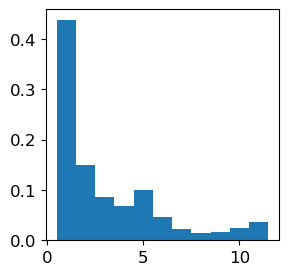

In [11]:
plt.figure(figsize=(3,3))
plt.hist(nclass,bins=np.arange(0.5,12.5,1),density=True)
plt.show()

In [12]:
#plot 3 per example, sorted according to how monotonic they are

kufactors=np.array([0.1,0.5,2.5,10])
allkufactors=np.logspace(-1,1,50)
msizes=[120,75,40,15]

1-3 3
nndd : 3 parsets
0
1
2
pndd : 2 parsets
0
1
ppdd : 15 parsets
0
1
2
3
4
5
nndi : 2 parsets
0
1
pndi : 1 parsets
0
ppdi : 44 parsets
0
1
2
3
4
5
nnid : 144 parsets
15
76
50
39
14
7
34
46
58
npid : 37 parsets
25
28
5
12
24
2
7
9
26
ppid : 42 parsets
30
7
28
0
1
2
nnii : 33 parsets
29
30
1
32
2
8
5
14
npii : 20 parsets
6
15
9
18
10
5
ppii : 245 parsets
50
181
213
182
30
3
1
2
5


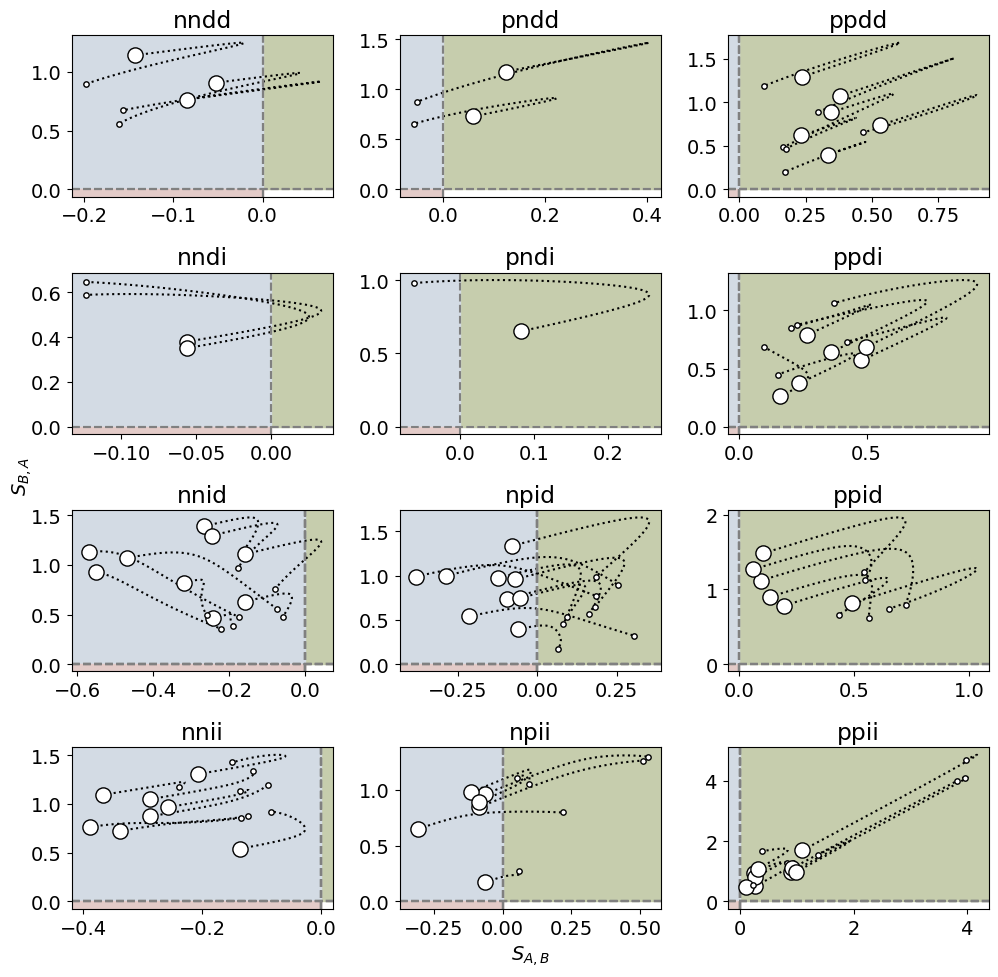

16-3 3
nndd : 3 parsets
0
1
2
pndd : 2 parsets
0
1
ppdd : 15 parsets
0
1
2
3
4
5
nndi : 2 parsets
0
1
pndi : 1 parsets
0
ppdi : 44 parsets
0
1
2
3
4
5
nnid : 144 parsets
15
76
50
39
14
7
34
46
58
npid : 37 parsets
25
28
5
12
24
2
7
9
26
ppid : 42 parsets
30
7
28
0
1
2
nnii : 33 parsets
29
30
1
32
2
8
5
14
npii : 20 parsets
6
15
9
18
10
5
ppii : 245 parsets
50
181
213
182
30
3
1
2
5


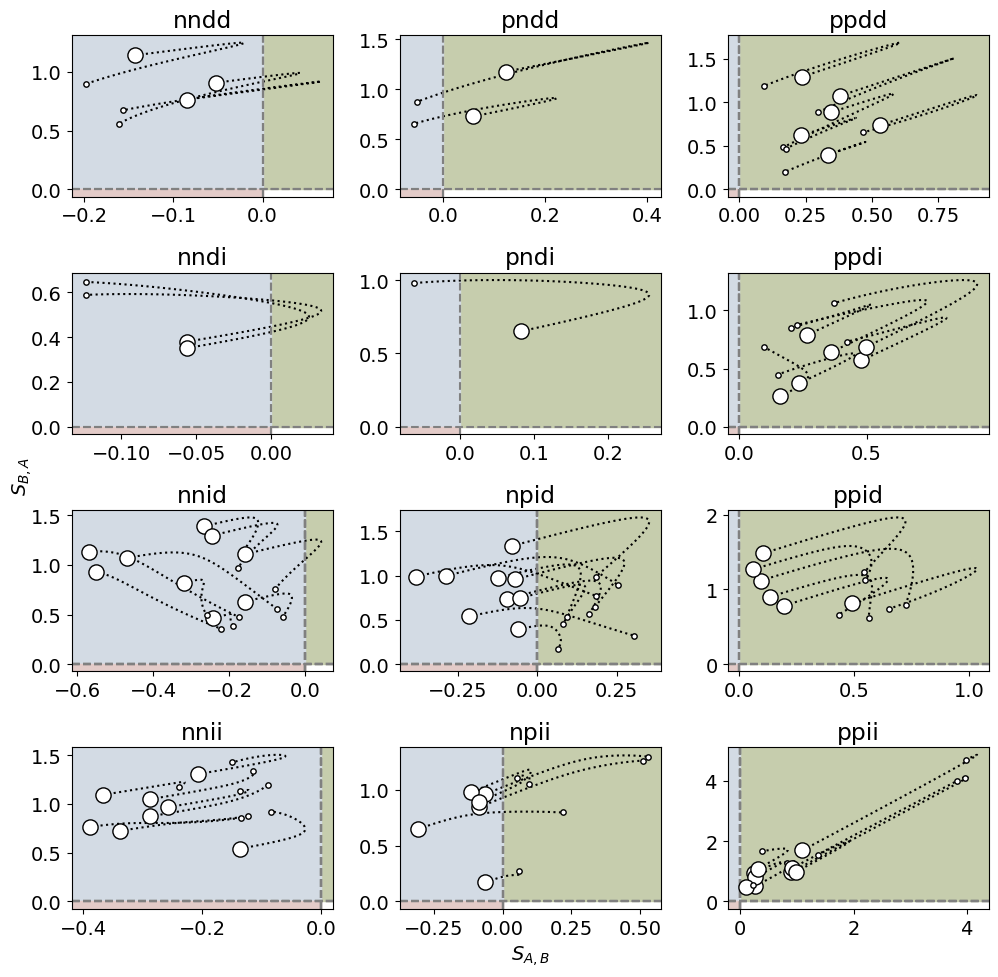

26-12 12
nndd : 10 parsets
2
4
5
0
1
3
pndd : 40 parsets
36
20
18
0
1
2
ppdd : 36 parsets
0
1
2
3
4
5
nndi : 76 parsets
62
65
33
41
49
51
2
4
14
pndi : 28 parsets
9
20
1
22
2
0
3
4
5
ppdi : 3 parsets
0
1
2
nnid : 148 parsets
31
120
7
121
2
4
13
15
17
npid : 21 parsets
14
7
6
12
20
8
ppid : 1 parsets
0
nnii : 6 parsets
2
5
3
4
npii : 1 parsets
0
ppii : 1 parsets
0


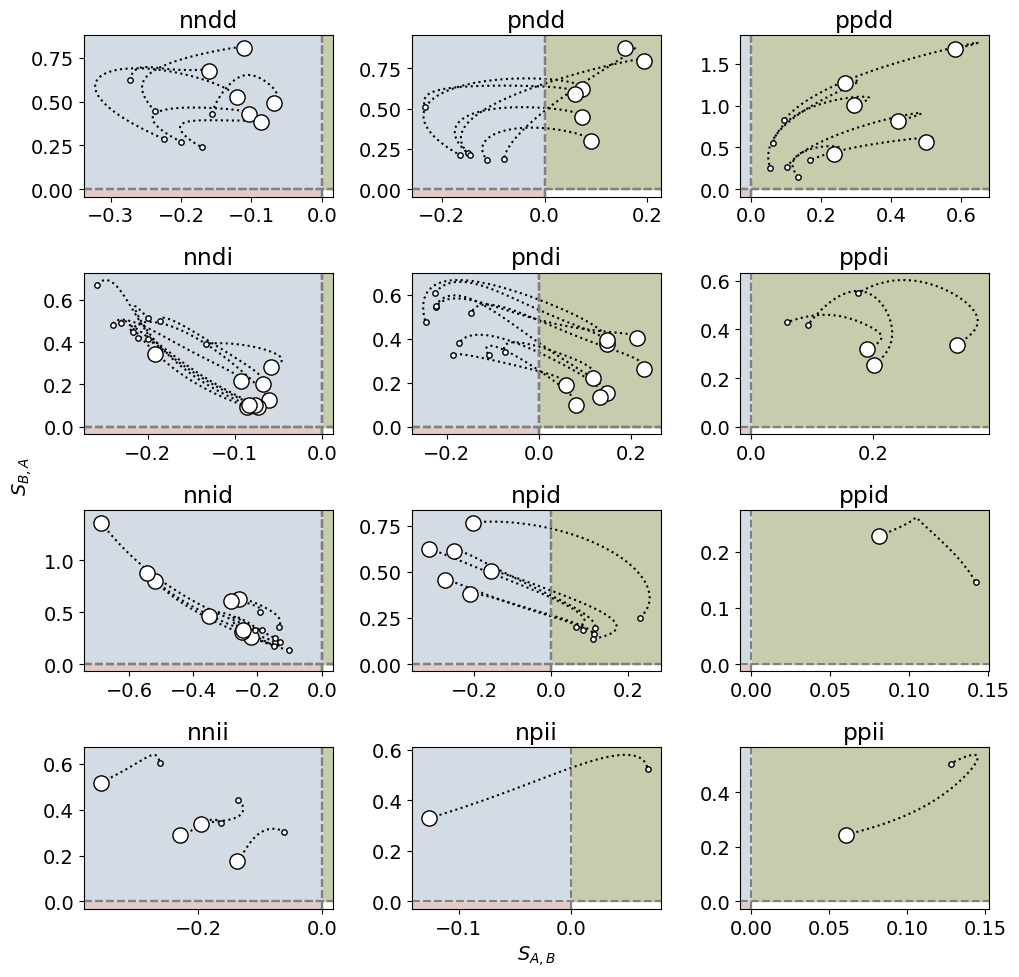

27-2 2
nndd : 7 parsets
0
1
2
3
4
5
pndd : 30 parsets
0
1
2
3
4
5
ppdd : 59 parsets
0
1
2
3
4
5
nndi : 9 parsets
3
8
0
1
2
4
5
pndi : 26 parsets
0
1
2
3
4
5
ppdi : 26 parsets
0
1
2
3
4
5
nnid : 192 parsets
142
9
21
103
180
151
8
10
18
npid : 24 parsets
15
7
22
20
10
4
6
ppid : 15 parsets
0
1
2
3
4
5
nnii : 24 parsets
2
23
16
8
22
14
21
npii : 9 parsets
2
4
8
0
1
6
ppii : 51 parsets
37
21
20
1
2
4


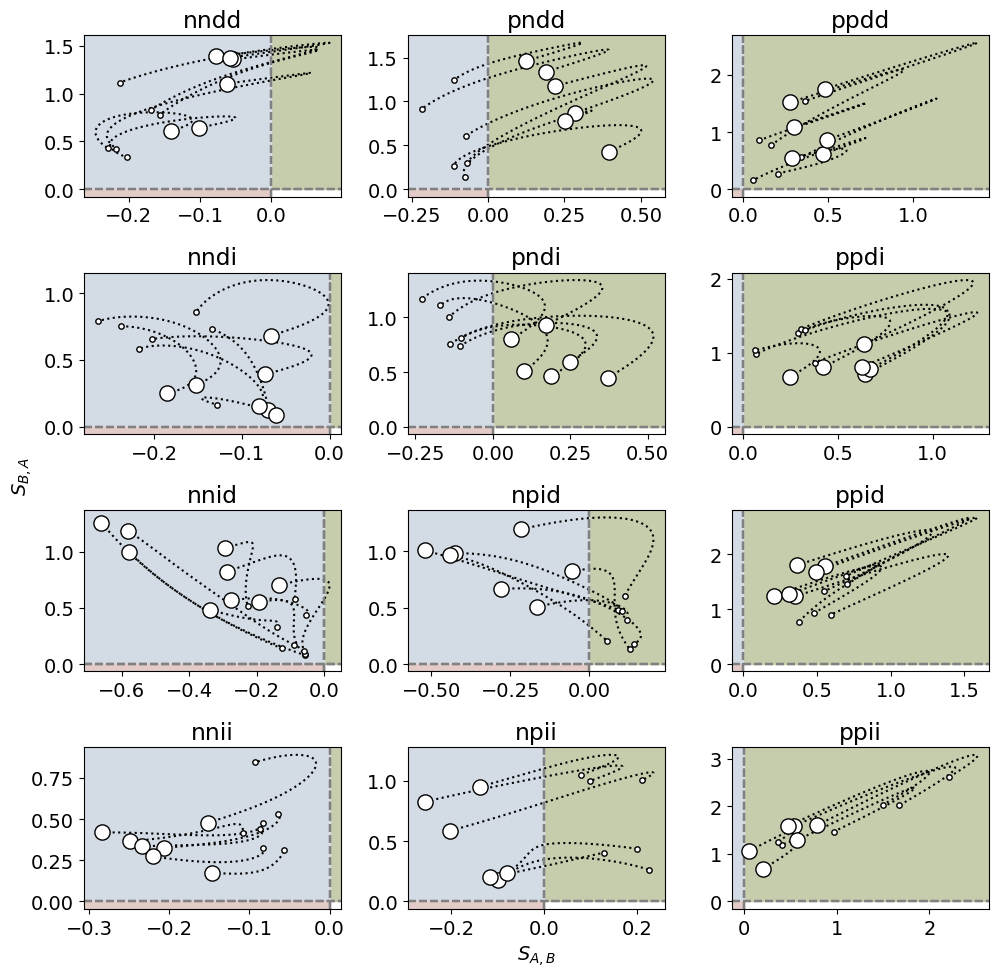

29-5 5
nndd : 8 parsets
0
1
2
3
4
5
pndd : 51 parsets
0
1
2
3
4
5
ppdd : 109 parsets
0
1
2
3
4
5
nndi : 65 parsets
16
4
50
11
56
55
0
2
5
pndi : 77 parsets
35
0
1
2
3
4
5
ppdi : 67 parsets
0
1
2
3
4
5
nnid : 64 parsets
45
36
41
12
27
17
4
5
11
npid : 4 parsets
3
1
2
0
ppid : 7 parsets
1
4
3
0
2
5
6
nnii : 18 parsets
10
6
3
13
11
4
7
npii : 7 parsets
3
2
0
ppii : 26 parsets
24
16
7
12
17
4
0
2
3


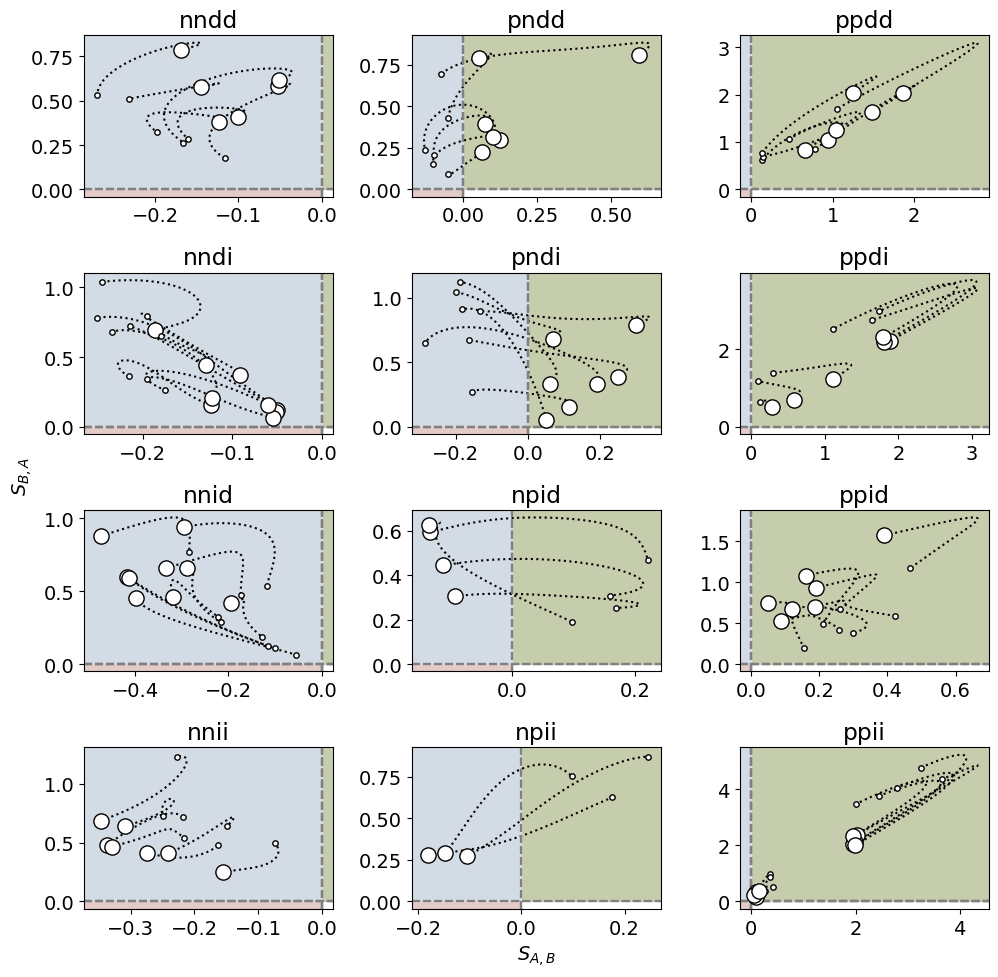

50-4 4
nndd : 1 parsets
0
pndd : 1 parsets
0
ppdd : 7 parsets
0
1
2
3
4
5
nndi : 3 parsets
0
2
1
pndi : 3 parsets
0
1
2
ppdi : 34 parsets
0
1
2
3
4
5
nnid : 165 parsets
123
26
112
62
23
71
10
43
44
npid : 15 parsets
1
14
11
9
0
3
5
6
12
ppid : 23 parsets
0
1
2
4
5
6
nnii : 60 parsets
52
44
13
7
4
15
3
npii : 14 parsets
7
3
11
ppii : 205 parsets
188
7
139
0
1
10


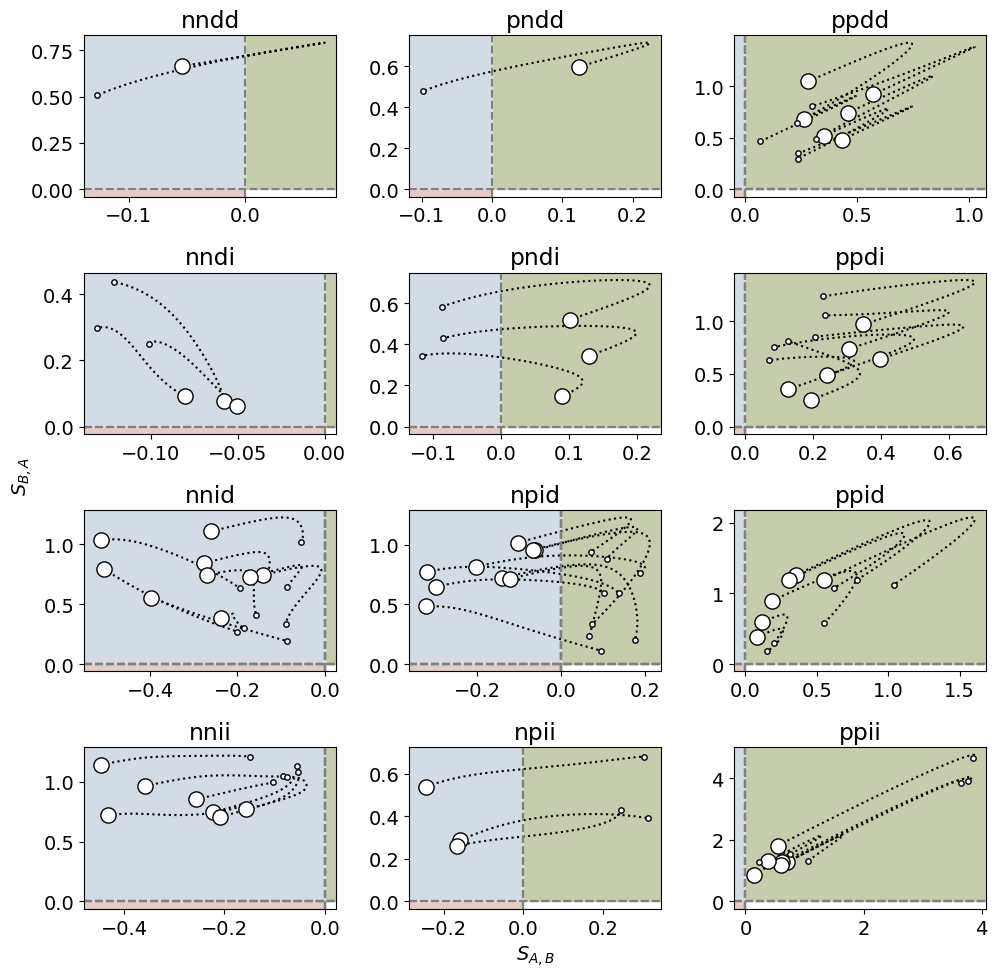

58-5 5
nndd : 7 parsets
0
1
2
3
4
5
pndd : 10 parsets
0
1
2
3
4
5
ppdd : 11 parsets
0
1
2
3
4
5
nndi : 37 parsets
8
1
25
0
2
3
4
5
6
pndi : 33 parsets
0
1
2
3
4
5
ppdi : 37 parsets
0
1
2
3
4
5
nnid : 188 parsets
29
184
87
127
106
46
3
10
13
npid : 4 parsets
1
0
ppid : 6 parsets
0
1
2
3
4
5
nnii : 77 parsets
60
71
0
13
66
51
1
9
10
npii : 10 parsets
2
4
3
6
8
5
9
ppii : 78 parsets
3
23
34
0
4
9


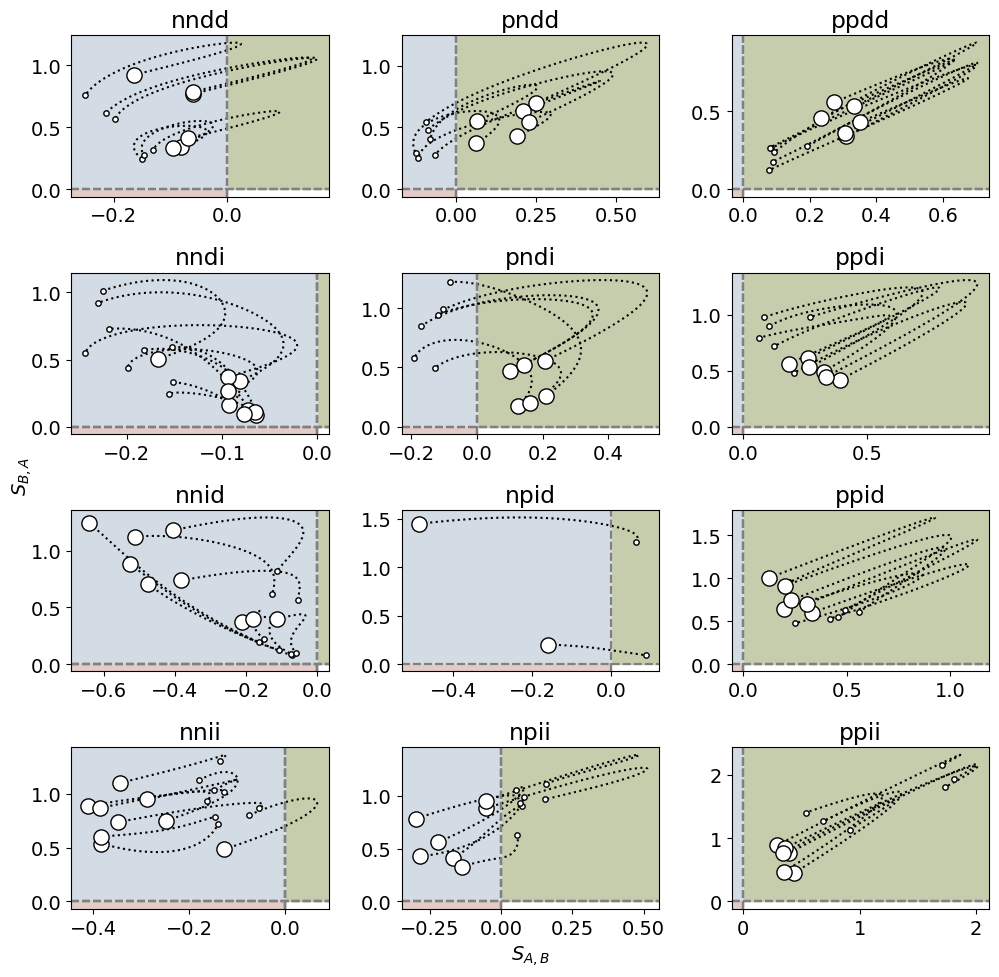

64-10 10
nndd : 1 parsets
0
pndd : 2 parsets
0
1
ppdd : 14 parsets
0
1
2
3
4
5
nndi : 3 parsets
0
1
2
pndi : 2 parsets
0
1
ppdi : 30 parsets
0
1
2
3
4
5
nnid : 227 parsets
145
160
133
70
117
20
80
110
155
npid : 41 parsets
26
13
19
28
14
38
35
ppid : 50 parsets
15
39
12
28
0
1
2
nnii : 25 parsets
23
7
15
11
1
20
21
npii : 7 parsets
4
0
6
2
1
ppii : 133 parsets
71
43
128
73
0
3
9


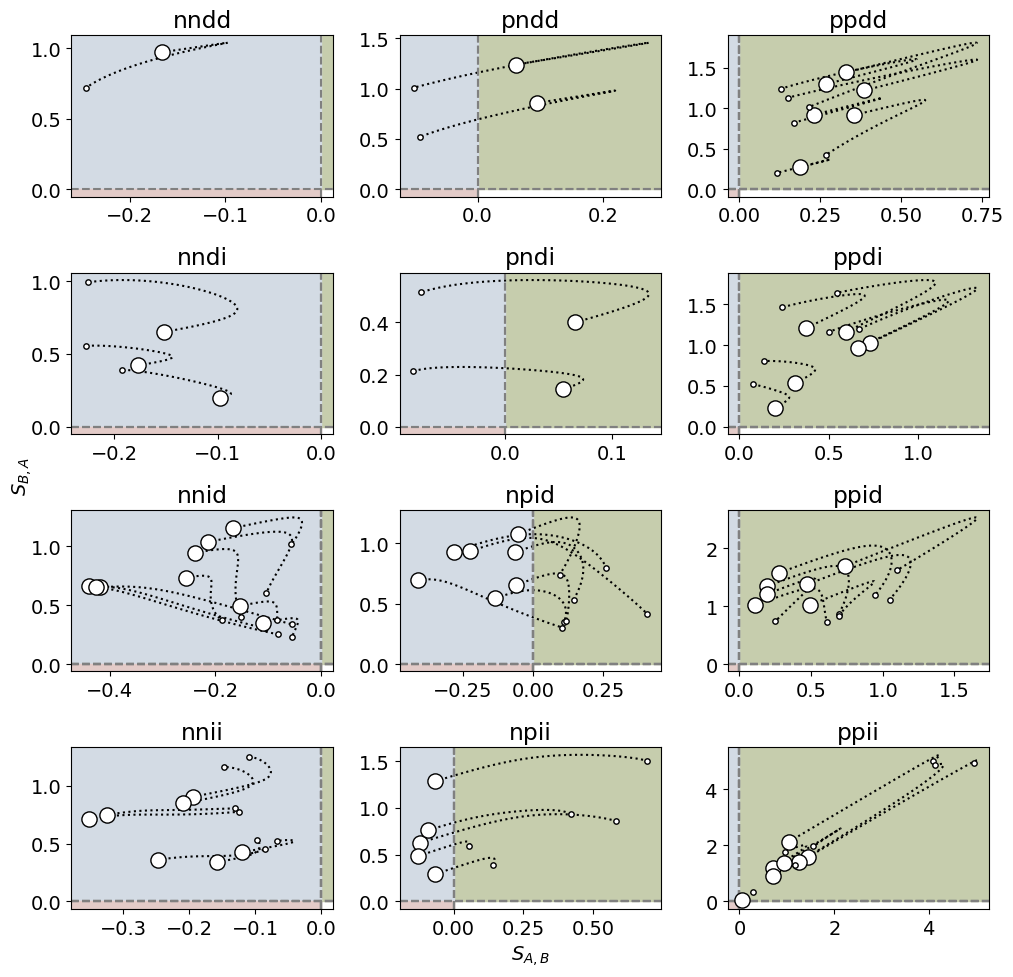

9-9 9
nndd : 11 parsets
0
1
2
3
4
5
pndd : 86 parsets
52
83
76
0
1
2
ppdd : 195 parsets
0
1
2
3
4
5
nndi : 18 parsets
0
1
2
3
4
5
pndi : 63 parsets
24
17
20
0
1
2
3
4
5
ppdi : 8 parsets
0
1
2
3
4
5
nnid : 96 parsets
57
65
83
51
2
34
10
12
14
npid : 19 parsets
4
13
6
8
11
15
9
ppid : 4 parsets
0
2
1
3
nnii : 22 parsets
14
9
3
2
7
6
npii : 14 parsets
10
8
7
6
13
11
ppii : 10 parsets
8
3
2
0
1
4


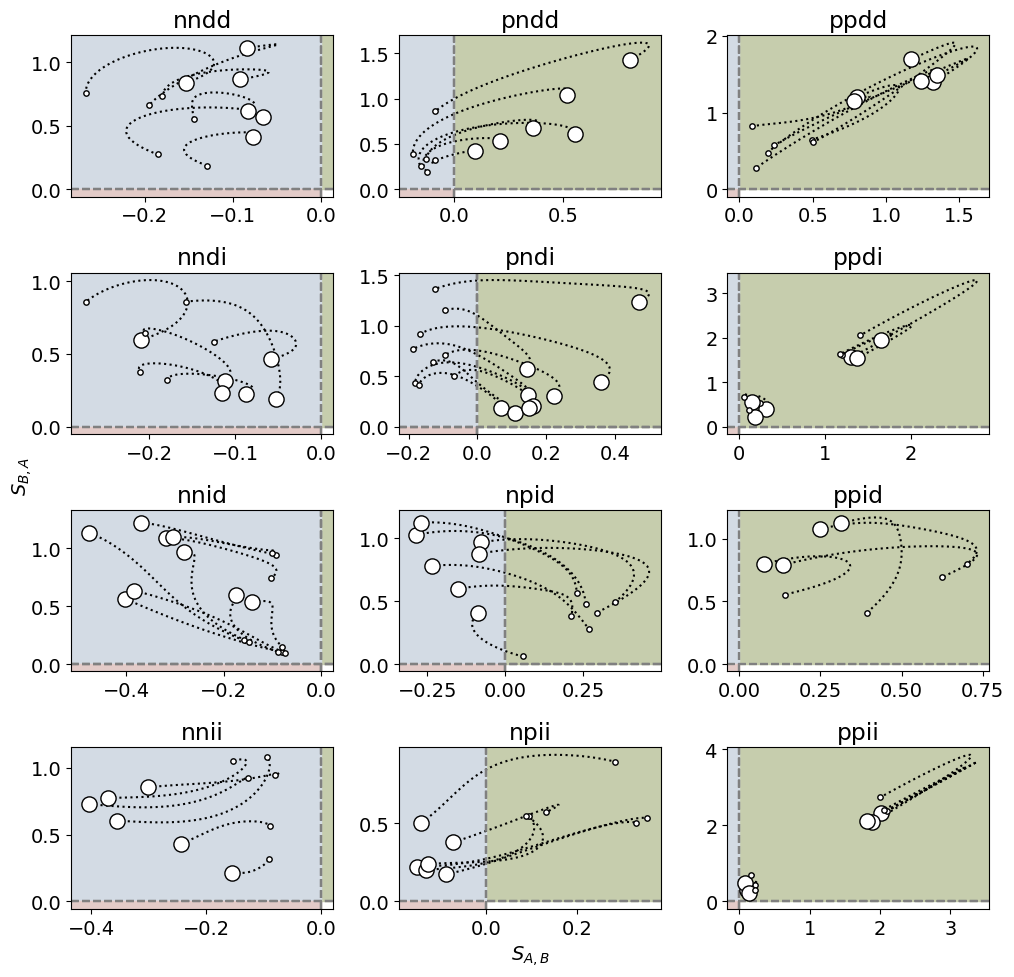

96-2 2
nndd : 2 parsets
0
1
pndd : 1 parsets
0
ppdd : 2 parsets
0
1
nndi : 3 parsets
0
1
2
pndi : 5 parsets
0
1
2
3
4
ppdi : 15 parsets
0
1
2
3
4
5
nnid : 284 parsets
231
201
200
139
226
130
15
39
55
npid : 27 parsets
18
26
12
11
7
8
1
3
4
ppid : 13 parsets
0
1
2
3
4
5
nnii : 47 parsets
7
40
9
21
12
8
29
36
41
npii : 6 parsets
0
1
2
3
4
ppii : 155 parsets
36
86
59
8
12
14


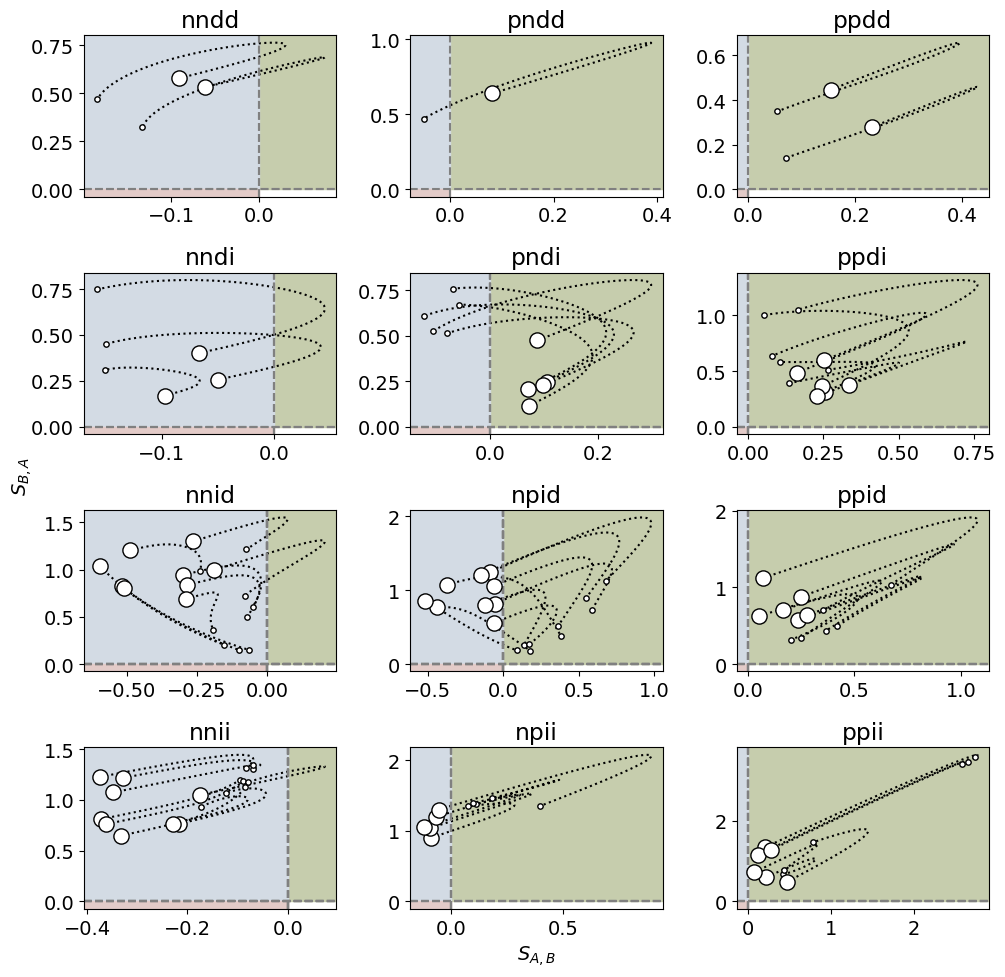

In [84]:
#plot the parameter sets that have all classes

for basalset in df.groupby(["id","npt1"]):
    id_,npt1=basalset[0]
    subset=basalset[1]
    classes=subset["class"].unique()
    #if True:
    if len(list(cset.intersection(classes)))==12:
        print(id_,npt1)
        fig,axes=plt.subplots(4,3,figsize=(10,10))
        for class_ in potential_classes:
        #for classdf in subset.groupby("class"):
            #class_=classdf[0]
            df_=subset[subset["class"]==class_]
            #if class_ in potential_classes:
            nplottedm=0
            nplottednm=0
            cl=potential_classes.index(class_)
            ax=axes[cl//3][cl%3]
            

            ax.set_title(class_)
            subset2=df_ #subset[subset["class"]==class_]
            print(class_,":",len(subset2),"parsets")

            #if len(subset)>20:
            #    subset=subset.sample(n=10,random_state=1)
            all_synergies=[]
            span_sAB=[]
            all_fullpars=[]
            breakpoints=[]
            originalrows=[]
            for row in np.arange(len(subset2)):

                #(range(len(subset2)),size=len(subset2),replace=False):
                #if nplottedm<3 or nplottednm<3:
                fullpars=subset2.iloc[row].values[3:3+24]
                #print(len(fullpars))

                synergies=[]
                cont=True
                for i in range(len(allkufactors)):
                    parset2=fullpars.copy()
                    parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*allkufactors[i]
                    #print(parset2)
                    syn0=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5)
                    if syn0[0]==None:
                        cont=False
                        break
                    else:
                        synergies.append(syn0)
                if cont:
                    all_synergies.append([row,synergies])
                    all_fullpars.append(fullpars)
                    synar=np.array(synergies)
                    sab=synar[:,0]
                    span_sAB.append(np.abs(sab[0]-sab[-1]))
                    originalrows.append(row)
                    #sba=synar[:,1]
                    dif=np.diff(sab)
                    sign=np.sign(dif)
                    uc=np.unique(sign)
                    if len(uc)==1:
                        breakpoints.append(len(sab))
                    else:
                        breakpoints.append(np.where(np.diff(sign)!=0)[0][0])
            
            
            
            
            breakpoints=np.array(breakpoints)
            span_sAB=np.array(span_sAB)
            nplottednm=0
            nplottedm=0
            #first plot monotonics
            monotonics=np.where(breakpoints==50)[0]
            
            if len(monotonics)>0:
                span_sAB_mono=span_sAB[monotonics]
                argsort=np.argsort(span_sAB_mono)[::-1] 
                npts=len(argsort)
                
                for idx in argsort: #plot first the ones that span longest sAB
                    row=monotonics[idx]
                    synergies=all_synergies[row][1]
                    fullpars=all_fullpars[row]

                    synab=np.array([x[0] for x in synergies]) 
                    synba=np.array([x[1] for x in synergies])
                    difab=np.sign(np.diff(synab))
                    difba=np.sign(np.diff(synba))
                    if len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                        if nplottedm<3:
                            print(originalrows[row])
                            nplottedm+=1
                            ax.plot(synab,synba,linestyle=":",color="k")
                            ax.axvline(x=0,color='grey',linestyle="--")
                            ax.axhline(y=0,color='grey',linestyle="--")
                            for i in [0,len(kufactors)-1]:
                                parset2=fullpars.copy()
                                #print(kufactors[i])
                                parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                                #print(parset2)
                                synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                                ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)

                
            #then plot the almost monotonics
            nonmonotonics1=np.where((breakpoints>30)&(breakpoints<45))[0]
            if len(nonmonotonics1)>0:
                span_sAB_nonmono=span_sAB[nonmonotonics1]
                argsort=np.argsort(span_sAB_nonmono)[::-1] 
                
                for idx in argsort:
                    row=nonmonotonics1[idx]
                    synergies=all_synergies[row][1]
                    fullpars=all_fullpars[row]

                    synab=np.array([x[0] for x in synergies]) 
                    synba=np.array([x[1] for x in synergies])
                    difab=np.sign(np.diff(synab))
                    difba=np.sign(np.diff(synba))
                    if True: #len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                        if nplottednm<3:
                            print(originalrows[row])
                            nplottednm+=1
                            ax.plot(synab,synba,linestyle=":",color="k")
                            ax.axvline(x=0,color='grey',linestyle="--")
                            ax.axhline(y=0,color='grey',linestyle="--")
                            for i in [0,len(kufactors)-1]:
                                parset2=fullpars.copy()
                                #print(kufactors[i])
                                parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                                #print(parset2)
                                synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                                ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)

                
                
            #finally the rest    
            mask1=np.where(breakpoints<30)[0]
            if len(mask1)>0:
                #argsort=np.argsort(breakpoints[mask1])
                for row in mask1: #argsort[::-1]:
                    synergies=all_synergies[row][1]
                    fullpars=all_fullpars[row]

                    synab=np.array([x[0] for x in synergies]) 
                    synba=np.array([x[1] for x in synergies])
                    difab=np.sign(np.diff(synab))
                    difba=np.sign(np.diff(synba))
                    if True: #len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                        if nplottednm<6:
                            print(originalrows[row])
                            nplottednm+=1
                            ax.plot(synab,synba,linestyle=":",color="k")
                            ax.axvline(x=0,color='grey',linestyle="--")
                            ax.axhline(y=0,color='grey',linestyle="--")
                            for i in [0,len(kufactors)-1]:
                                parset2=fullpars.copy()
                                #print(kufactors[i])
                                parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                                #print(parset2)
                                synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                                ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)

                        
            ax=tint_ax(ax)
        ax=axes[3,1]
        ax.set_xlabel("$S_{A,B}$")
        #ax.set_ylabel("$S_{B,A}$")
        fig.text(0,0.5,"$S_{B,A}$",rotation=90)
        plt.tight_layout()
        #plt.savefig("../figs/Fig4suppl1_%s.pdf"%id_,bbox_inches="tight")
        plt.show()
        

                
        
    
    

99-9 9
nndd : 11 parsets
9
1
4
0
pndd : 86 parsets
52
83
76
51
ppdd : 195 parsets
83
88
125
46
nndi : 18 parsets
7
13
15
10
pndi : 63 parsets
24
17
20
8
ppdi : 8 parsets
2
3
6
7
nnid : 96 parsets
57
65
83
51
npid : 19 parsets
4
13
6
8
ppid : 4 parsets
0
2
3
1
nnii : 22 parsets
14
9
3
2
npii : 14 parsets
10
8
7
6
ppii : 10 parsets
8
3
2
7


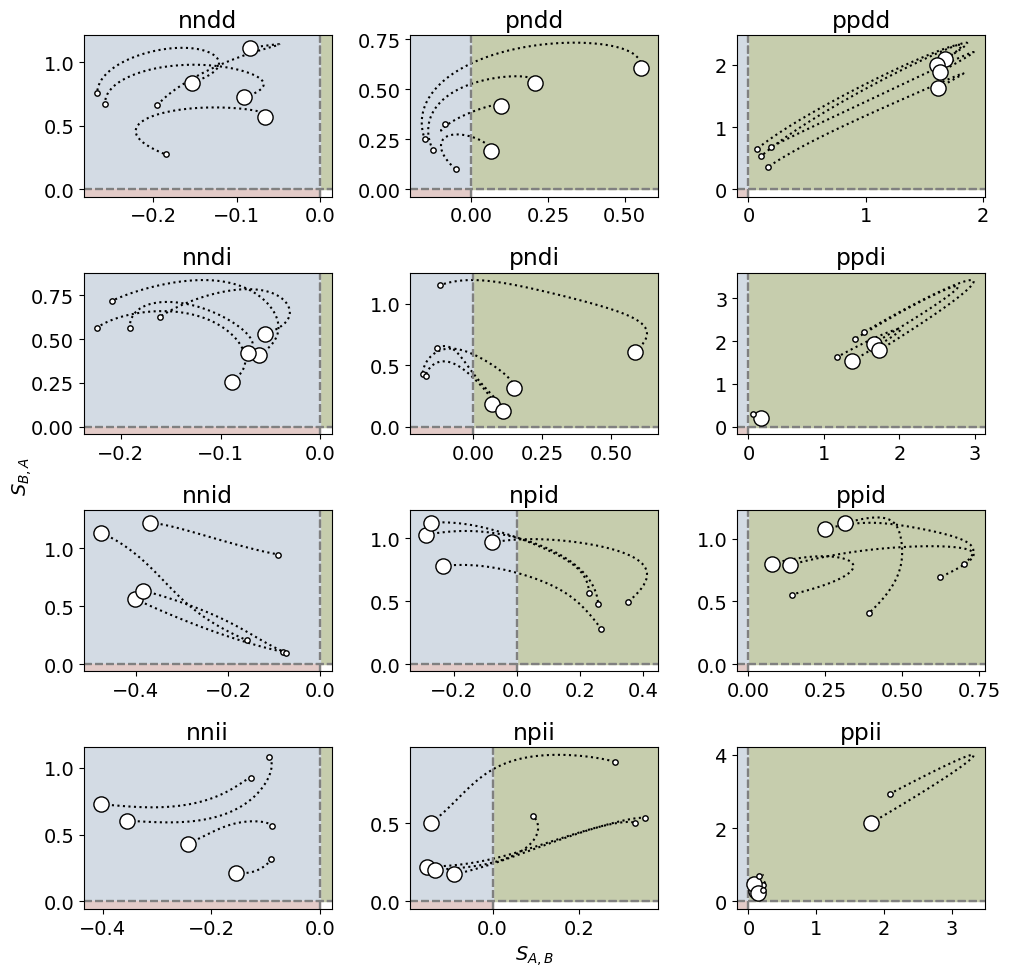

In [145]:
#Figure S4A
subset=df[df["id"]=="9-9"]
classes=subset["class"].unique()
#if True:
if len(list(cset.intersection(classes)))==12:
    print(id_,npt1)
    fig,axes=plt.subplots(4,3,figsize=(10,10))
    for class_ in potential_classes:
    #for classdf in subset.groupby("class"):
        #class_=classdf[0]
        df_=subset[subset["class"]==class_]
        #if class_ in potential_classes:
        nplottedm=0
        nplottednm=0
        
        cl=potential_classes.index(class_)
        ax=axes[cl//3][cl%3]


        ax.set_title(class_)
        subset2=df_ #subset[subset["class"]==class_]
        print(class_,":",len(subset2),"parsets")

        #if len(subset)>20:
        #    subset=subset.sample(n=10,random_state=1)
        all_synergies=[]
        span_sAB=[]
        all_fullpars=[]
        breakpoints=[]
        originalrows=[]
        for row in np.arange(len(subset2)):

            #(range(len(subset2)),size=len(subset2),replace=False):
            #if nplottedm<3 or nplottednm<3:
            fullpars=subset2.iloc[row].values[3:3+24]
            #print(len(fullpars))

            synergies=[]
            cont=True
            for i in range(len(allkufactors)):
                parset2=fullpars.copy()
                parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*allkufactors[i]
                #print(parset2)
                syn0=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5)
                if syn0[0]==None:
                    cont=False
                    break
                else:
                    synergies.append(syn0)
            if cont:
                all_synergies.append([row,synergies])
                all_fullpars.append(fullpars)
                synar=np.array(synergies)
                sab=synar[:,0]
                span_sAB.append(np.abs(sab[0]-sab[-1]))
                originalrows.append(row)
                #sba=synar[:,1]
                dif=np.diff(sab)
                sign=np.sign(dif)
                uc=np.unique(sign)
                if len(uc)==1:
                    breakpoints.append(len(sab))
                else:
                    breakpoints.append(np.where(np.diff(sign)!=0)[0][0])




        breakpoints=np.array(breakpoints)
        span_sAB=np.array(span_sAB)
        nplottednm=0
        nplottedm=0
        #first plot monotonics
        monotonics=np.where(breakpoints==50)[0]

        if len(monotonics)>0:
            span_sAB_mono=span_sAB[monotonics]
            argsort=np.argsort(span_sAB_mono)[::-1] 
            npts=len(argsort)

            for idx in argsort: #plot first the ones that span longest sAB
                row=monotonics[idx]
                synergies=all_synergies[row][1]
                fullpars=all_fullpars[row]

                synab=np.array([x[0] for x in synergies]) 
                synba=np.array([x[1] for x in synergies])
                difab=np.sign(np.diff(synab))
                difba=np.sign(np.diff(synba))
                if len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                    if nplottedm<3:
                        print(originalrows[row])
                        nplottedm+=1
                        ax.plot(synab,synba,linestyle=":",color="k")
                        ax.axvline(x=0,color='grey',linestyle="--")
                        ax.axhline(y=0,color='grey',linestyle="--")
                        for i in [0,len(kufactors)-1]:
                            parset2=fullpars.copy()
                            #print(kufactors[i])
                            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                            #print(parset2)
                            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)


        #then plot the almost monotonics
        nonmonotonics1=np.where((breakpoints>30)&(breakpoints<45))[0]
        if len(nonmonotonics1)>0:
            span_sAB_nonmono=span_sAB[nonmonotonics1]
            argsort=np.argsort(span_sAB_nonmono)[::-1] 

            for idx in argsort:
                row=nonmonotonics1[idx]
                synergies=all_synergies[row][1]
                fullpars=all_fullpars[row]

                synab=np.array([x[0] for x in synergies]) 
                synba=np.array([x[1] for x in synergies])
                difab=np.sign(np.diff(synab))
                difba=np.sign(np.diff(synba))
                if True: #len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                    if nplottedm+nplottednm<4:
                        print(originalrows[row])
                        nplottednm+=1
                        ax.plot(synab,synba,linestyle=":",color="k")
                        ax.axvline(x=0,color='grey',linestyle="--")
                        ax.axhline(y=0,color='grey',linestyle="--")
                        for i in [0,len(kufactors)-1]:
                            parset2=fullpars.copy()
                            #print(kufactors[i])
                            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                            #print(parset2)
                            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)



        #finally the rest    
        nonmonotonics2=np.where(breakpoints<30)[0]
        if len(mask1)>0:
            span_sAB_nonmono=span_sAB[nonmonotonics2]
            argsort=np.argsort(span_sAB_nonmono)[::-1] 

            for idx in argsort:
                row=nonmonotonics2[idx]
            
                synergies=all_synergies[row][1]
                fullpars=all_fullpars[row]

                synab=np.array([x[0] for x in synergies]) 
                synba=np.array([x[1] for x in synergies])
                difab=np.sign(np.diff(synab))
                difba=np.sign(np.diff(synba))
                if True: #len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                    if nplottedm+nplottednm<4:
                        print(originalrows[row])
                        nplottednm+=1
                        ax.plot(synab,synba,linestyle=":",color="k")
                        ax.axvline(x=0,color='grey',linestyle="--")
                        ax.axhline(y=0,color='grey',linestyle="--")
                        for i in [0,len(kufactors)-1]:
                            parset2=fullpars.copy()
                            #print(kufactors[i])
                            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                            #print(parset2)
                            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)


        ax=tint_ax(ax)
    ax=axes[3,1]
    ax.set_xlabel("$S_{A,B}$")
    #ax.set_ylabel("$S_{B,A}$")
    fig.text(0,0.5,"$S_{B,A}$",rotation=90)
    plt.tight_layout()
    plt.savefig("../figs/Fig4suppl1_0813.pdf",bbox_inches="tight")
    plt.show()

In [146]:
10**(1.5)

31.622776601683793

99-9 9
nndd : 11 parsets
0
1
2
3
4
5
pndd : 86 parsets
52
83
76
0
1
2
ppdd : 195 parsets
0
1
2
3
4
5
nndi : 18 parsets
0
1
2
3
4
5
pndi : 63 parsets
24
17
20
0
1
2
3
4
5
ppdi : 8 parsets
0
1
2
3
4
5
nnid : 96 parsets
57
65
83
51
2
34
10
12
14
npid : 19 parsets
4
13
6
8
11
15
9
ppid : 4 parsets
0
2
1
3
nnii : 22 parsets
14
9
3
2
7
6
npii : 14 parsets
10
8
7
6
13
11
ppii : 10 parsets
8
3
2
0
1
4


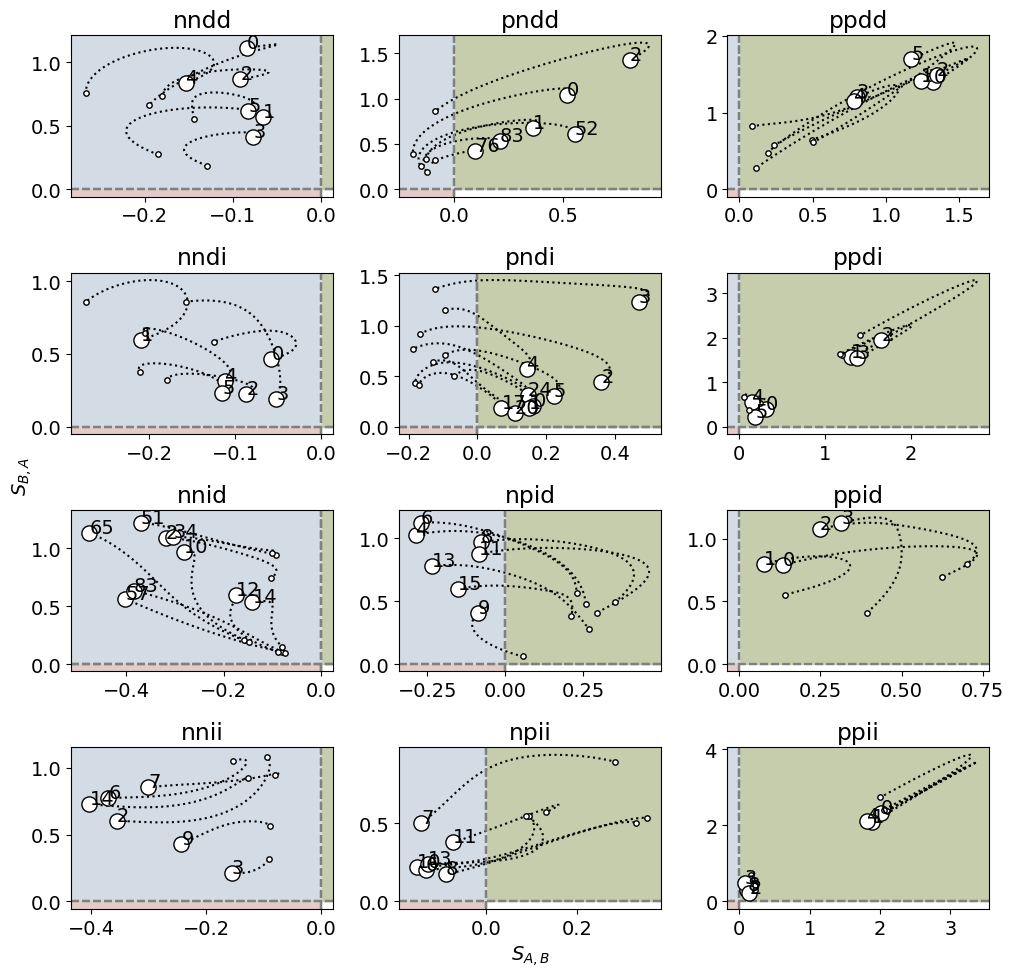

In [92]:
#same set as above with the row corresponding to each line, so I can select concrete examples below
#notice that the way the lines are selected is not exactly the same
subset=df[df["id"]=="9-9"]
classes=subset["class"].unique()
#if True:
if len(list(cset.intersection(classes)))==12:
    print(id_,npt1)
    fig,axes=plt.subplots(4,3,figsize=(10,10))
    for class_ in potential_classes:
    #for classdf in subset.groupby("class"):
        #class_=classdf[0]
        df_=subset[subset["class"]==class_]
        #if class_ in potential_classes:
        nplottedm=0
        nplottednm=0
        cl=potential_classes.index(class_)
        ax=axes[cl//3][cl%3]


        ax.set_title(class_)
        subset2=df_ #subset[subset["class"]==class_]
        print(class_,":",len(subset2),"parsets")

        #if len(subset)>20:
        #    subset=subset.sample(n=10,random_state=1)
        all_synergies=[]
        span_sAB=[]
        all_fullpars=[]
        breakpoints=[]
        originalrows=[]
        for row in np.arange(len(subset2)):

            #(range(len(subset2)),size=len(subset2),replace=False):
            #if nplottedm<3 or nplottednm<3:
            fullpars=subset2.iloc[row].values[3:3+24]
            #print(len(fullpars))

            synergies=[]
            cont=True
            for i in range(len(allkufactors)):
                parset2=fullpars.copy()
                parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*allkufactors[i]
                #print(parset2)
                syn0=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5)
                if syn0[0]==None:
                    cont=False
                    break
                else:
                    synergies.append(syn0)
            if cont:
                all_synergies.append([row,synergies])
                all_fullpars.append(fullpars)
                synar=np.array(synergies)
                sab=synar[:,0]
                span_sAB.append(np.abs(sab[0]-sab[-1]))
                originalrows.append(row)
                #sba=synar[:,1]
                dif=np.diff(sab)
                sign=np.sign(dif)
                uc=np.unique(sign)
                if len(uc)==1:
                    breakpoints.append(len(sab))
                else:
                    breakpoints.append(np.where(np.diff(sign)!=0)[0][0])




        breakpoints=np.array(breakpoints)
        span_sAB=np.array(span_sAB)
        nplottednm=0
        nplottedm=0
        #first plot monotonics
        monotonics=np.where(breakpoints==50)[0]

        if len(monotonics)>0:
            span_sAB_mono=span_sAB[monotonics]
            argsort=np.argsort(span_sAB_mono)[::-1] 
            npts=len(argsort)

            for idx in argsort: #plot first the ones that span longest sAB
                row=monotonics[idx]
                synergies=all_synergies[row][1]
                fullpars=all_fullpars[row]

                synab=np.array([x[0] for x in synergies]) 
                synba=np.array([x[1] for x in synergies])
                difab=np.sign(np.diff(synab))
                difba=np.sign(np.diff(synba))
                if len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                    if nplottedm<3:
                        print(originalrows[row])
                        nplottedm+=1
                        ax.plot(synab,synba,linestyle=":",color="k")
                        ax.axvline(x=0,color='grey',linestyle="--")
                        ax.axhline(y=0,color='grey',linestyle="--")
                        for i in [0,len(kufactors)-1]:
                            parset2=fullpars.copy()
                            #print(kufactors[i])
                            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                            #print(parset2)
                            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)
                        ax.text(synab[0],synba[0],str(originalrows[row]))


        #then plot the almost monotonics
        nonmonotonics1=np.where((breakpoints>30)&(breakpoints<45))[0]
        if len(nonmonotonics1)>0:
            span_sAB_nonmono=span_sAB[nonmonotonics1]
            argsort=np.argsort(span_sAB_nonmono)[::-1] 

            for idx in argsort:
                row=nonmonotonics1[idx]
                synergies=all_synergies[row][1]
                fullpars=all_fullpars[row]

                synab=np.array([x[0] for x in synergies]) 
                synba=np.array([x[1] for x in synergies])
                difab=np.sign(np.diff(synab))
                difba=np.sign(np.diff(synba))
                if True: #len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                    if nplottednm<3:
                        print(originalrows[row])
                        nplottednm+=1
                        ax.plot(synab,synba,linestyle=":",color="k")
                        ax.axvline(x=0,color='grey',linestyle="--")
                        ax.axhline(y=0,color='grey',linestyle="--")
                        for i in [0,len(kufactors)-1]:
                            parset2=fullpars.copy()
                            #print(kufactors[i])
                            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                            #print(parset2)
                            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)
                        ax.text(synab[0],synba[0],str(originalrows[row]))



        #finally the rest    
        mask1=np.where(breakpoints<30)[0]
        if len(mask1)>0:
            #argsort=np.argsort(breakpoints[mask1])
            for row in mask1: #argsort[::-1]:
                synergies=all_synergies[row][1]
                fullpars=all_fullpars[row]

                synab=np.array([x[0] for x in synergies]) 
                synba=np.array([x[1] for x in synergies])
                difab=np.sign(np.diff(synab))
                difba=np.sign(np.diff(synba))
                if True: #len(np.unique(difab)==1) and len(np.unique(difba)==1): #monotonic
                    if nplottednm<6:
                        print(originalrows[row])
                        nplottednm+=1
                        ax.plot(synab,synba,linestyle=":",color="k")
                        ax.axvline(x=0,color='grey',linestyle="--")
                        ax.axhline(y=0,color='grey',linestyle="--")
                        for i in [0,len(kufactors)-1]:
                            parset2=fullpars.copy()
                            #print(kufactors[i])
                            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
                            #print(parset2)
                            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
                            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)
                        ax.text(synab[0],synba[0],str(originalrows[row]))

        ax=tint_ax(ax)
    ax=axes[3,1]
    ax.set_xlabel("$S_{A,B}$")
    #ax.set_ylabel("$S_{B,A}$")
    fig.text(0,0.5,"$S_{B,A}$",rotation=90)
    plt.tight_layout()
    #plt.savefig("../figs/Fig4suppl1_0813.pdf",bbox_inches="tight")
    plt.show()

**starting class ppii
10
ppii : $k_{1,\emptyset}=4.288$,$k_{2,\emptyset}=11.023$,$k_{3,\emptyset}=3.414$,$k_{4,\emptyset}=10.362$
ppii : $k_{1,A}=937.265$,$k_{2,A}=8084.904$,$k_{3,A}=5.392$,$k_{4,A}=1.982$,$k_{1,B}=9.945$,$k_{2,B}=18.372$,$k_{3,B}=2047.513$,$k_{4,B}=8.447$


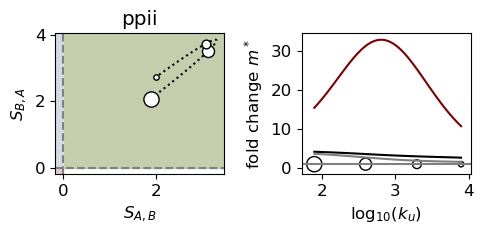

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[8084.9037378922385 5.391513015485366 1.9817547505307664 937.2648289953163]
[18.37215412442494 2047.5128566850215 8.446642290372537 9.945330826048046]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[ 0.2963693  15.02906303  0.13786442  2.08533217  0.21258967 13.10223572
 16.0252612   2.01060693  0.99619817 13.01845609  3.0068051  15.1875679
  2.11377799 17.30134589 15.21601371]
dominant path> [(2, 8), (8, 7), (7, 6), (6, 0), (0, 3), (3, 5), (5, 2)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[ 0.79586135 35.19978579  0.25133237  2.3181629   0.90363805 33.42615187
 35.46958124  1.66585722  0.26979545 33.53392857  1.93565268 35.74431477
  1.06615025 36.81046503 34.4923021

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
//anaconda3/li

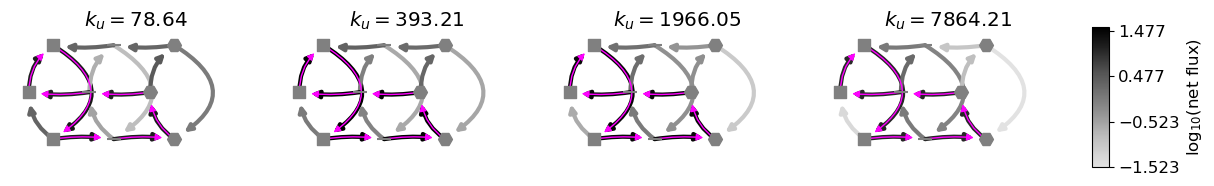

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[8084.9037378922385 5.391513015485366 1.9817547505307664 937.2648289953163]
[18.37215412442494 2047.5128566850215 8.446642290372537 9.945330826048046]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[ 0.2963693  15.02906303  0.13786442  2.08533217  0.21258967 13.10223572
 16.0252612   2.01060693  0.99619817 13.01845609  3.0068051  15.1875679
  2.11377799 17.30134589 15.21601371]
dominant path> [(2, 8), (8, 7), (7, 6), (6, 0), (0, 3), (3, 5), (5, 2)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[ 0.79586135 35.19978579  0.25133237  2.3181629   0.90363805 33.42615187
 35.46958124  1.66585722  0.26979545 33.53392857  1.93565268 35.74431477
  1.06615025 36.81046503 34.4923021

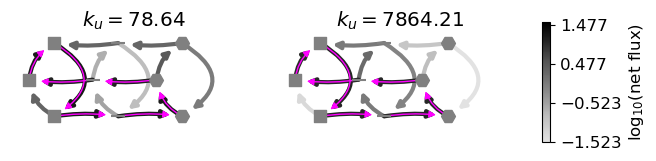

**starting class npii
14
npii : $k_{1,\emptyset}=4.288$,$k_{2,\emptyset}=11.023$,$k_{3,\emptyset}=3.414$,$k_{4,\emptyset}=10.362$
npii : $k_{1,A}=4.844$,$k_{2,A}=6345.641$,$k_{3,A}=151.500$,$k_{4,A}=7.354$,$k_{1,B}=4.504$,$k_{2,B}=17.664$,$k_{3,B}=2601.429$,$k_{4,B}=3.088$


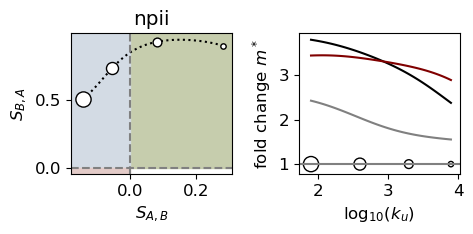

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[6345.640802879322 151.50012216483887 7.354154284821592 4.844142159153076]
[17.664368510171602 2601.4289084182888 3.0876129260388527
 4.503994463950867]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-5.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.01478463 0.74044701 0.09667229 1.53775178 0.62106239 0.27291468
 1.32302132 1.01336169 0.58257431 1.59593599 0.65855934 2.77216684
 3.43072618 0.87919244 1.8929744 ]
dominant path> [(2, 1), (1, 7), (7, 6), (6, 8), (8, 7)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '3-5.AB' '4-1.AB' '4-3.AB'
 '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.0466632  2.11810454 0.1737725  2.61088377 1.94786071 2.28330586
 0.83679555 0.16520132 1.28130899 1.00199687 1.99099525 1.71616968
 3.70716493 0.61988852 1.09628116]
dominant path> [(2, 1), (1, 7), (7, 6), 

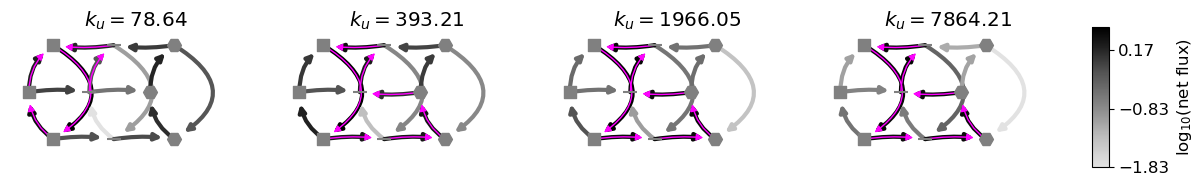

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[6345.640802879322 151.50012216483887 7.354154284821592 4.844142159153076]
[17.664368510171602 2601.4289084182888 3.0876129260388527
 4.503994463950867]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-5.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.01478463 0.74044701 0.09667229 1.53775178 0.62106239 0.27291468
 1.32302132 1.01336169 0.58257431 1.59593599 0.65855934 2.77216684
 3.43072618 0.87919244 1.8929744 ]
dominant path> [(2, 1), (1, 7), (7, 6), (6, 8), (8, 7)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '3-5.AB' '4-1.AB' '4-3.AB'
 '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.0466632  2.11810454 0.1737725  2.61088377 1.94786071 2.28330586
 0.83679555 0.16520132 1.28130899 1.00199687 1.99099525 1.71616968
 3.70716493 0.61988852 1.09628116]
dominant path> [(2, 1), (1, 7), (7, 6), 

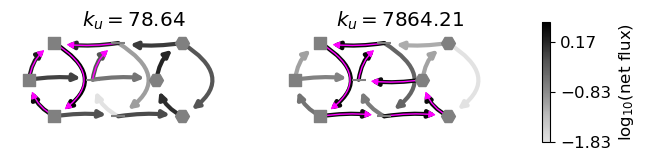

**starting class npid
19
npid : $k_{1,\emptyset}=4.288$,$k_{2,\emptyset}=11.023$,$k_{3,\emptyset}=3.414$,$k_{4,\emptyset}=10.362$
npid : $k_{1,A}=6.784$,$k_{2,A}=740.850$,$k_{3,A}=56.436$,$k_{4,A}=2.010$,$k_{1,B}=4.821$,$k_{2,B}=11.997$,$k_{3,B}=909.506$,$k_{4,B}=8.354$


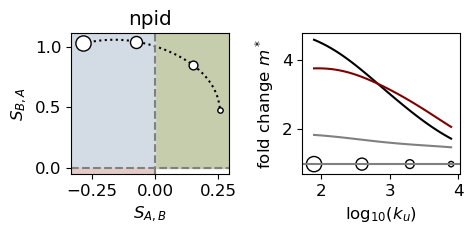

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[740.8499511447383 56.43618383461021 2.0097700086744683 6.784060122276559]
[11.997348569121295 909.5064858006757 8.353804674504419 4.821208311885086]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[0.03408846 1.62064489 0.11632628 1.48397303 0.57069176 0.05443404
 2.06781104 1.02960755 0.44716615 0.59103734 1.4767737  1.53840707
 2.39535216 3.93375923 2.4497862 ]
dominant path> [(2, 1), (1, 7), (7, 6), (6, 8), (8, 7)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[0.08135335 2.95087672 0.26500797 2.32533597 1.7830262  0.44188613
 3.10768369 0.80731774 0.15680698 2.14355898 0.96412472 2.7672221
 1.01353609 3.78075819 1.45542222]
dominant path> [(2, 1), (1, 7), (7, 6), (6, 

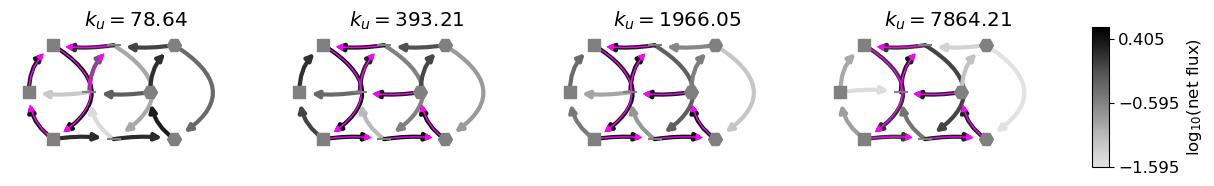

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[740.8499511447383 56.43618383461021 2.0097700086744683 6.784060122276559]
[11.997348569121295 909.5064858006757 8.353804674504419 4.821208311885086]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[0.03408846 1.62064489 0.11632628 1.48397303 0.57069176 0.05443404
 2.06781104 1.02960755 0.44716615 0.59103734 1.4767737  1.53840707
 2.39535216 3.93375923 2.4497862 ]
dominant path> [(2, 1), (1, 7), (7, 6), (6, 8), (8, 7)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-7.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-1.AB'
 '4-3.AB' '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-6.AB' '8-7.AB']
[0.08135335 2.95087672 0.26500797 2.32533597 1.7830262  0.44188613
 3.10768369 0.80731774 0.15680698 2.14355898 0.96412472 2.7672221
 1.01353609 3.78075819 1.45542222]
dominant path> [(2, 1), (1, 7), (7, 6), (6, 

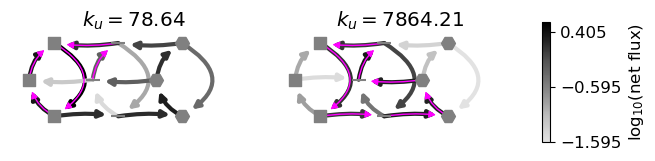

**starting class pndd
86
pndd : $k_{1,\emptyset}=4.288$,$k_{2,\emptyset}=11.023$,$k_{3,\emptyset}=3.414$,$k_{4,\emptyset}=10.362$
pndd : $k_{1,A}=120.985$,$k_{2,A}=154.358$,$k_{3,A}=4.561$,$k_{4,A}=2.854$,$k_{1,B}=5.007$,$k_{2,B}=25.685$,$k_{3,B}=15.086$,$k_{4,B}=2.083$


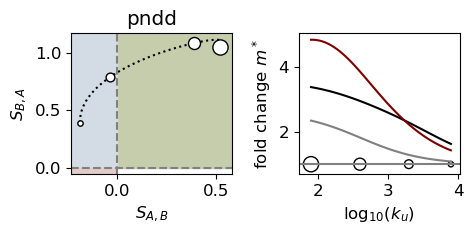

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[154.35807879444567 4.560969893845903 2.8544567090627977
 120.98512800864536]
[25.684640752166352 15.085872675228426 2.082603735603376 5.007498239061733]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-4.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-3.AB'
 '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-1.AB' '7-6.AB' '8-7.AB']
[0.43510504 3.10117986 0.14003596 0.11559508 0.03542398 3.616456
 3.81105703 0.70987717 3.21677495 0.59428209 3.39624894 1.52904008
 0.22020706 4.92528902 5.14549608]
dominant path> [(2, 8), (8, 7), (7, 6), (6, 0), (0, 3), (3, 5), (5, 2)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-2.AB' '1-4.AB' '2-8.AB' '3-5.AB' '4-3.AB'
 '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-1.AB' '7-6.AB' '8-7.AB']
[1.27901377 1.99312292 0.50611325 0.04191461 0.30154092 3.61559222
 2.51383854 0.52071562 2.29466384 0.2191747  2.76602344 0.8152213
 0.84956878 3.58124474 4.43081351]
dominant path> [(2, 8), (8

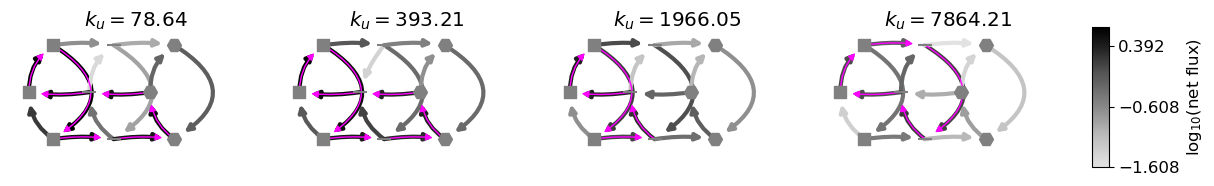

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[154.35807879444567 4.560969893845903 2.8544567090627977
 120.98512800864536]
[25.684640752166352 15.085872675228426 2.082603735603376 5.007498239061733]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-3.AB' '1-0.AB' '1-4.AB' '2-1.AB' '2-8.AB' '3-5.AB' '4-3.AB'
 '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-1.AB' '7-6.AB' '8-7.AB']
[0.43510504 3.10117986 0.14003596 0.11559508 0.03542398 3.616456
 3.81105703 0.70987717 3.21677495 0.59428209 3.39624894 1.52904008
 0.22020706 4.92528902 5.14549608]
dominant path> [(2, 8), (8, 7), (7, 6), (6, 0), (0, 3), (3, 5), (5, 2)]
kufactor=0.5
['0-2.AB' '0-3.AB' '1-0.AB' '1-2.AB' '1-4.AB' '2-8.AB' '3-5.AB' '4-3.AB'
 '5-2.AB' '5-4.AB' '6-0.AB' '6-8.AB' '7-1.AB' '7-6.AB' '8-7.AB']
[1.27901377 1.99312292 0.50611325 0.04191461 0.30154092 3.61559222
 2.51383854 0.52071562 2.29466384 0.2191747  2.76602344 0.8152213
 0.84956878 3.58124474 4.43081351]
dominant path> [(2, 8), (8

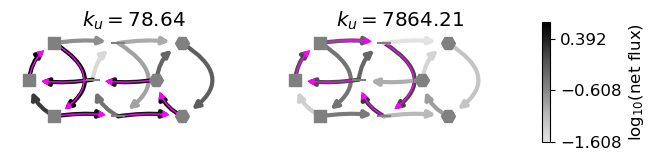

**starting class pndi
63
pndi : $k_{1,\emptyset}=4.288$,$k_{2,\emptyset}=11.023$,$k_{3,\emptyset}=3.414$,$k_{4,\emptyset}=10.362$
pndi : $k_{1,A}=6.317$,$k_{2,A}=517.659$,$k_{3,A}=1433.877$,$k_{4,A}=1.095$,$k_{1,B}=11.275$,$k_{2,B}=326.127$,$k_{3,B}=15.328$,$k_{4,B}=10.223$


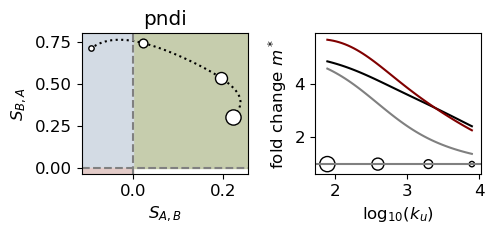

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[517.6587296234306 1433.87701339458 1.0954061935630786 6.31663026423171]
[326.1271387686158 15.328286748595493 10.22329173058383 11.274973761606395]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-6.AB' '1-0.AB' '1-4.AB' '1-7.AB' '2-1.AB' '2-5.AB' '3-0.AB'
 '3-5.AB' '4-3.AB' '5-4.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.05504348 2.59756263 0.05829687 0.06886809 0.49432731 0.62149227
 2.52544115 2.59430924 1.07199921 3.66630846 3.59744037 5.61649097
 3.01892833 3.09188994 2.52460102]
dominant path> [(2, 5), (5, 4), (4, 3), (3, 0), (0, 6), (6, 8), (8, 2)]
kufactor=0.5
['0-2.AB' '0-6.AB' '1-0.AB' '1-4.AB' '1-7.AB' '2-1.AB' '2-5.AB' '3-0.AB'
 '3-5.AB' '4-3.AB' '5-4.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.07548378 2.52502523 0.2126101  0.29687031 1.35055868 1.8600391
 2.0910286  2.38789891 0.24841513 2.63631405 2.33944373 5.32244973
 2.7974245  3.87558392 1.44686582]
dominant path> [(2, 5), (5, 4

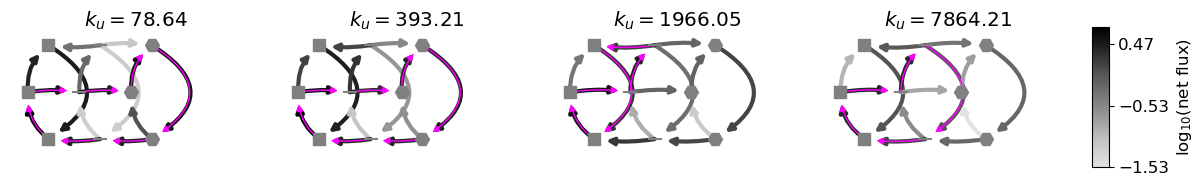

[11.023132772274337 3.41352916302802 10.362262685621307 4.288069558215076]
[517.6587296234306 1433.87701339458 1.0954061935630786 6.31663026423171]
[326.1271387686158 15.328286748595493 10.22329173058383 11.274973761606395]
180.1913991589436 786.4206980362358
kufactor=0.1
['0-2.AB' '0-6.AB' '1-0.AB' '1-4.AB' '1-7.AB' '2-1.AB' '2-5.AB' '3-0.AB'
 '3-5.AB' '4-3.AB' '5-4.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.05504348 2.59756263 0.05829687 0.06886809 0.49432731 0.62149227
 2.52544115 2.59430924 1.07199921 3.66630846 3.59744037 5.61649097
 3.01892833 3.09188994 2.52460102]
dominant path> [(2, 5), (5, 4), (4, 3), (3, 0), (0, 6), (6, 8), (8, 2)]
kufactor=0.5
['0-2.AB' '0-6.AB' '1-0.AB' '1-4.AB' '1-7.AB' '2-1.AB' '2-5.AB' '3-0.AB'
 '3-5.AB' '4-3.AB' '5-4.AB' '6-8.AB' '7-6.AB' '8-2.AB' '8-7.AB']
[0.07548378 2.52502523 0.2126101  0.29687031 1.35055868 1.8600391
 2.0910286  2.38789891 0.24841513 2.63631405 2.33944373 5.32244973
 2.7974245  3.87558392 1.44686582]
dominant path> [(2, 5), (5, 4

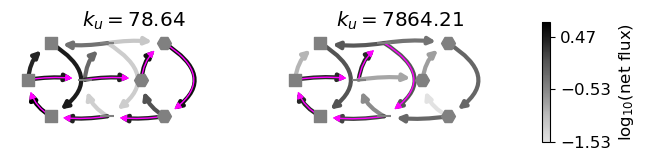

In [13]:
#Now select examples for 9-9
fontsize=12

subset0=df[df["id"]=="9-9"]

classes_row=[["ppii",1],["npii",7],["npid",4],["pndd",0],["pndi",5]] #npid 13 is an example where the flux diagram traverses the whole graph in the smallest synergy
nidx=0
for cs in classes_row:
    class_,rowidx=cs
    subset=subset0[subset0["class"]==class_]
    print("**starting class",class_)
    print(len(subset))

    #class_="ppdi"

    row=subset.iloc[rowidx]
    
    fullpars=row.values[3:3+24]
    ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA,ktiaB,ktanB,ktinB,ktniB,kb,ku=fullpars[0:14]
    ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA,ktiaB,ktanB,ktinB,ktniB,kb,ku=fullpars[0:14]
    print(class_,":",'$k_{1,\emptyset}=%2.3f$,$k_{2,\emptyset}=%2.3f$,$k_{3,\emptyset}=%2.3f$,$k_{4,\emptyset}=%2.3f$'%(ktni0,ktia0,ktan0,ktin0))
    print(class_,":",'$k_{1,A}=%2.3f$,$k_{2,A}=%2.3f$,$k_{3,A}=%2.3f$,$k_{4,A}=%2.3f$,$k_{1,B}=%2.3f$,$k_{2,B}=%2.3f$,$k_{3,B}=%2.3f$,$k_{4,B}=%2.3f$'%(ktniA,ktiaA,ktanA,ktinA,ktniB,ktiaB,ktanB,ktinB))
    synergiesab=[]
    synergiesba=[]
    mlist=[]
    cont=True
    allkus=[]
    for i in range(len(allkufactors)):
        parset2=fullpars.copy()
        parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*allkufactors[i]
        allkus.append(parset2[13])
        #print(parset2)
        out=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
        if out[0]==None:
            cont=False
            break
        else:
            synab,synba,m=out
            synergiesab.append(synab)
            synergiesba.append(synba)
            mlist.append(m)
    if allkus[0]<10:
        cont=False
    if cont:
        
        synab=np.array(synergiesab)
        synba=np.array(synergiesba)
        difab=np.sign(np.diff(synab))
        difba=np.sign(np.diff(synba))
        

        fig,axes=plt.subplots(1,2,figsize=(5,2.5))
        ax=axes[0]
        ax.set_title(class_)

        ax.plot(synab,synba,linestyle=":",color="k")
        kus=[]
        for i in range(len(kufactors)):
            parset2=fullpars.copy()
            #print(kufactors[i])
            parset2[[13,15,17,19,21,23]]=parset2[[13,15,17,19,21,23]]*kufactors[i]
            kus.append(parset2[13])
            #print(parset2)
            synabs,synbas,m=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=5,fcpair=5,returnm=True)
            ax.scatter(synabs,synbas,facecolor="white",edgecolor="k",s=msizes[i],zorder=3)


        ax.axvline(x=0,color='grey',linestyle="--")
        ax.axhline(y=0,color='grey',linestyle="--")
        ax.set_xlabel("$S_{A,B}$")
        ax.set_ylabel("$S_{B,A}$")
        tint_ax(ax)
        ax.tick_params(axis='both',labelsize=fontsize)

        ax=axes[1]
        m0=np.array([m[0] for m in mlist])
        mA=np.array([m[1] for m in mlist])
        mB=np.array([m[2] for m in mlist])
        mAB=np.array([m[3] for m in mlist])
        mA=mA/m0
        mB=mB/m0
        mAB=mAB/m0

        ax.plot(np.log10(allkus),mA,color="k",label="2A")
        ax.plot(np.log10(allkus),mB,color="gray",label="2B")
        ax.plot(np.log10(allkus),mAB,color="maroon",label="AB")

        ax.set_xlabel(r'log$_{10}$($k_u$)',fontsize=fontsize)
        ax.set_ylabel(r"fold change $m^*$",fontsize=fontsize)
        ax.tick_params(axis='both',labelsize=fontsize)
        #ax.legend(loc='lower left',bbox_to_anchor=(0,1),ncol=3)
        ax.axhline(y=1,color='grey')
        ax.scatter(np.log10(kus),[1]*len(kufactors),s=msizes,edgecolors='k',facecolors='white')
        plt.tight_layout()
        plt.savefig("../figs/Fig4_select_%d.svg"%(nidx),bbox_inches="tight")
        plt.show()
        makeplot(fullpars,plotfluxesonly=True)

        makeplot(fullpars,plotfluxesonly=True,nplotfluxes=2,idxtosave=nidx)
        nidx+=1


In [35]:
#take the ones in class npii, npid, pndd, pndi, and look at fluxes at smallest and largest sAB
#this is slow. Only need to execute once, results are saved

kufactors=np.array([0.1,0.5,2.5,10])
B=1
Bar=np.array([B])
A=1
netJ=True
node0=2
rightnodes=[3,4,5]
leftnodes=[6,7,8]
dp_types=dict()
class_lists=[["npii"],["npid"],["pndd"],["pndi"]]
for list_ in class_lists:
    subset=df[df["class"].isin(list_)]
    lname=",".join(list_)
    print(lname)
    print(len(subset["id"].unique()),"basal parameter sets")
    dp_type=[] #1 if dominant path spans both cycles, 0 otherwise
    for j in range(len(subset)):
        row=subset.iloc[j]
        parset=row.values[3:3+24]
        dp_parset=[]
        
        allkufactors=np.arange(0.1,10.0,0.05)
        synergies=[]

        for i in range(len(allkufactors)):
            parset2=parset.copy()
            parset2[[13,15,17,19,21,23]]=parset[[13,15,17,19,21,23]]*allkufactors[i]
            syn=compute_synergyb(parset2,PolAB_A_allpars.interface_GRF_PolAB_A_A)
            if syn[0] is None:
                print("None found")
                break
            
            synergies.append(syn)
            rhos=PolAB_A_allpars.interface_rhos_GRF_PolAB_A_A(parset2,Bar,A)
            P=rhos/np.sum(rhos)
            J=fluxes.get_fluxes(edges_,A,B,parset2,P,netJ=netJ)
            Js_ar=J.flatten()
            #print(Js_ar)
            #keep only those columns with nonzero fluxes
            mask=[]
            for col in range(nnodes*nnodes):
                if np.any(Js_ar[col]>1e-15):
                    mask.append(col)
            #mat=np.log10(all_Js)[:,mask]
            Js_ar=Js_ar[mask]
            names_ar=all_fnames[mask]
            #print("kufactor=%g"%kufactors[i])
            #print(names_ar)
            #print(Js_ar)
            G=fluxes.get_graph_fromJarray(np.log10(Js_ar),names_ar,min_=-15)
            Gs=[G]
            G2=fluxes.get_dominant_path_G(G,node0)
            #print("dominant path>",G2.edges())
            nodes=G2.nodes()
            right=len(np.intersect1d(nodes,rightnodes))>0
            left=len(np.intersect1d(nodes,leftnodes))>0
            if right and left:
                dp_parset.append(1) #dominant flux path spans nodes with both A and B bounds
            else: 
                dp_parset.append(0) #dominant flux path does not span nodes with both A and B bound
        sAB=[x[0] for x in synergies]
        
        argmaxSAB=np.argmax(sAB)
        argminSAB=np.argmin(sAB)
        print(argminSAB,argmaxSAB,j)
        first=dp_parset[argminSAB]
        last=dp_parset[argmaxSAB]
        dp_type.append(last-first)
    dp_types[lname]=dp_type

npii
214 basal parameter sets
0 56 0
0 120 1
0 121 2
0 57 3
0 137 4
0 147 5
0 97 6
0 131 7
0 97 8
0 96 9
0 86 10
0 115 11
0 197 12
0 88 13
0 76 14
0 117 15
0 115 16
0 187 17
0 197 18
0 151 19
0 57 20
0 195 21
0 75 22
0 157 23
0 150 24
0 197 25
0 141 26
0 120 27
0 111 28
0 197 29
0 89 30
0 171 31
0 150 32
0 80 33
0 92 34
0 121 35
0 132 36
0 156 37
0 104 38
0 96 39
0 97 40
0 137 41
0 79 42
0 142 43
0 130 44
0 92 45
0 134 46
0 119 47
0 72 48
0 123 49
0 197 50
0 111 51
0 96 52
0 55 53
0 112 54
0 141 55
0 197 56
0 127 57
0 116 58
0 153 59
0 107 60
0 119 61
0 114 62
0 100 63
0 81 64
0 95 65
0 197 66
0 73 67
0 197 68
0 121 69
0 129 70
0 68 71
0 160 72
0 111 73
0 127 74
0 197 75
0 106 76
0 91 77
0 197 78
0 197 79
0 163 80
0 99 81
0 121 82
0 108 83
0 119 84
0 96 85
0 82 86
0 94 87
0 125 88
0 197 89
0 103 90
0 117 91
0 83 92
0 102 93
0 128 94
0 90 95
0 89 96
0 112 97
0 75 98
0 146 99
0 104 100
0 174 101
0 90 102
0 130 103
0 75 104
0 126 105
0 197 106
0 159 107
0 105 108
0 87 109
0 197 110
0 119 

0 61 855
0 75 856
0 197 857
0 52 858
0 197 859
0 197 860
0 131 861
0 60 862
0 59 863
0 197 864
0 197 865
0 99 866
0 197 867
0 73 868
0 58 869
0 197 870
0 197 871
0 197 872
0 197 873
0 197 874
0 53 875
0 45 876
0 79 877
0 197 878
0 54 879
0 56 880
0 197 881
0 68 882
0 46 883
0 197 884
0 55 885
0 45 886
0 197 887
0 50 888
0 197 889
0 197 890
0 72 891
0 87 892
0 197 893
0 197 894
0 60 895
0 85 896
0 197 897
0 197 898
0 56 899
0 73 900
0 124 901
0 197 902
0 197 903
0 93 904
0 83 905
0 61 906
0 86 907
0 41 908
0 83 909
0 197 910
0 197 911
0 83 912
0 197 913
0 108 914
0 197 915
0 197 916
0 197 917
0 67 918
0 72 919
0 84 920
0 59 921
0 169 922
0 53 923
0 69 924
0 60 925
0 62 926
0 70 927
0 110 928
0 177 929
0 89 930
0 197 931
0 86 932
0 71 933
0 111 934
0 71 935
0 59 936
0 49 937
0 46 938
0 35 939
0 31 940
0 46 941
0 28 942
0 44 943
0 48 944
0 51 945
0 51 946
0 43 947
0 28 948
0 34 949
0 45 950
0 52 951
0 51 952
0 46 953
0 40 954
0 43 955
0 40 956
0 57 957
0 40 958
0 44 959
0 52 960
0 52 961


0 50 1642
0 79 1643
0 61 1644
0 30 1645
0 72 1646
0 35 1647
0 44 1648
0 57 1649
0 30 1650
0 48 1651
0 45 1652
0 44 1653
0 49 1654
0 39 1655
0 59 1656
0 53 1657
0 46 1658
0 69 1659
0 37 1660
0 42 1661
0 60 1662
0 36 1663
0 72 1664
0 42 1665
0 35 1666
0 71 1667
0 38 1668
0 59 1669
0 73 1670
0 66 1671
0 50 1672
0 62 1673
0 64 1674
0 36 1675
0 38 1676
0 43 1677
0 34 1678
0 90 1679
0 43 1680
0 53 1681
0 131 1682
0 63 1683
0 197 1684
0 38 1685
0 43 1686
0 43 1687
0 42 1688
0 55 1689
0 197 1690
0 48 1691
0 92 1692
0 47 1693
0 42 1694
0 42 1695
0 166 1696
0 154 1697
0 197 1698
0 120 1699
0 197 1700
0 197 1701
0 197 1702
0 197 1703
0 197 1704
0 197 1705
0 150 1706
0 197 1707
0 174 1708
0 197 1709
0 197 1710
0 197 1711
0 114 1712
0 197 1713
0 197 1714
0 197 1715
0 197 1716
0 98 1717
0 197 1718
0 197 1719
0 152 1720
0 197 1721
0 197 1722
0 113 1723
0 136 1724
0 197 1725
0 197 1726
0 197 1727
0 197 1728
0 94 1729
0 197 1730
0 197 1731
0 197 1732
0 197 1733
0 197 1734
0 169 1735
0 197 1736
0 154 17

0 77 2408
0 72 2409
0 197 2410
0 67 2411
0 153 2412
0 63 2413
0 70 2414
0 117 2415
0 92 2416
0 117 2417
0 144 2418
0 75 2419
0 147 2420
0 186 2421
0 94 2422
0 197 2423
0 107 2424
0 132 2425
0 170 2426
0 106 2427
0 197 2428
0 99 2429
0 175 2430
0 94 2431
0 105 2432
0 197 2433
0 160 2434
0 72 2435
0 131 2436
0 128 2437
0 172 2438
0 137 2439
0 179 2440
0 155 2441
0 156 2442
0 155 2443
0 81 2444
0 197 2445
0 109 2446
0 197 2447
0 86 2448
0 136 2449
0 197 2450
0 83 2451
0 197 2452
0 70 2453
0 123 2454
0 173 2455
0 104 2456
0 127 2457
0 125 2458
0 112 2459
0 128 2460
0 166 2461
0 77 2462
0 114 2463
0 197 2464
0 197 2465
0 55 2466
0 123 2467
0 66 2468
0 197 2469
0 58 2470
0 187 2471
0 116 2472
0 47 2473
0 99 2474
0 171 2475
0 150 2476
0 115 2477
0 197 2478
0 112 2479
0 107 2480
0 76 2481
0 165 2482
0 197 2483
0 109 2484
0 165 2485
0 66 2486
0 131 2487
0 168 2488
0 197 2489
0 86 2490
0 147 2491
0 73 2492
0 83 2493
0 133 2494
0 185 2495
0 100 2496
0 87 2497
0 118 2498
0 115 2499
0 197 2500
0 17

0 197 3179
0 197 3180
0 197 3181
0 197 3182
0 197 3183
0 197 3184
0 197 3185
0 197 3186
0 197 3187
0 197 3188
0 197 3189
0 197 3190
0 197 3191
0 197 3192
0 197 3193
0 197 3194
0 197 3195
0 197 3196
0 197 3197
0 197 3198
0 197 3199
0 197 3200
0 197 3201
0 197 3202
0 197 3203
0 197 3204
0 197 3205
0 197 3206
0 197 3207
0 197 3208
0 197 3209
0 197 3210
0 197 3211
0 197 3212
0 197 3213
0 105 3214
0 79 3215
0 57 3216
0 136 3217
0 42 3218
0 97 3219
0 197 3220
0 125 3221
0 103 3222
0 197 3223
0 167 3224
0 61 3225
0 176 3226
0 75 3227
0 153 3228
0 110 3229
0 137 3230
0 120 3231
0 58 3232
0 85 3233
0 105 3234
0 85 3235
0 90 3236
0 63 3237
0 67 3238
0 135 3239
0 169 3240
0 86 3241
0 124 3242
0 89 3243
0 76 3244
0 73 3245
0 97 3246
0 171 3247
0 181 3248
0 86 3249
0 193 3250
0 75 3251
0 197 3252
0 49 3253
0 98 3254
0 197 3255
0 58 3256
0 62 3257
0 47 3258
0 197 3259
0 58 3260
0 197 3261
0 65 3262
0 58 3263
0 93 3264
0 197 3265
0 80 3266
0 72 3267
0 55 3268
0 58 3269
0 57 3270
0 57 3271
0 197 3272


0 87 3954
0 69 3955
0 83 3956
0 66 3957
0 131 3958
0 89 3959
0 143 3960
0 68 3961
0 89 3962
0 65 3963
0 118 3964
0 116 3965
0 94 3966
0 119 3967
0 61 3968
0 106 3969
0 66 3970
0 126 3971
0 87 3972
0 90 3973
0 40 3974
0 83 3975
0 54 3976
0 96 3977
0 106 3978
0 75 3979
0 71 3980
0 71 3981
0 160 3982
0 170 3983
0 167 3984
0 62 3985
0 83 3986
0 154 3987
0 93 3988
0 55 3989
0 130 3990
0 45 3991
0 103 3992
0 53 3993
0 135 3994
0 49 3995
0 79 3996
0 57 3997
0 118 3998
0 151 3999
0 76 4000
0 94 4001
0 99 4002
0 98 4003
0 73 4004
0 84 4005
0 40 4006
0 139 4007
0 72 4008
0 155 4009
0 36 4010
0 69 4011
0 50 4012
0 59 4013
0 117 4014
0 57 4015
0 94 4016
0 123 4017
0 69 4018
0 44 4019
0 96 4020
0 120 4021
0 53 4022
0 140 4023
0 62 4024
0 197 4025
0 108 4026
0 56 4027
0 71 4028
0 62 4029
0 86 4030
0 63 4031
0 125 4032
0 78 4033
0 74 4034
0 90 4035
0 106 4036
0 100 4037
0 63 4038
0 64 4039
0 157 4040
0 77 4041
0 40 4042
0 85 4043
0 164 4044
0 76 4045
0 59 4046
0 102 4047
0 132 4048
0 111 4049
0 79 40

0 81 4740
0 58 4741
0 53 4742
0 52 4743
0 68 4744
0 77 4745
0 45 4746
0 60 4747
0 197 4748
0 141 4749
0 64 4750
0 126 4751
0 60 4752
0 135 4753
0 132 4754
0 86 4755
0 197 4756
0 76 4757
0 93 4758
0 93 4759
0 166 4760
0 192 4761
0 60 4762
0 128 4763
0 85 4764
0 51 4765
0 139 4766
0 101 4767
0 164 4768
0 56 4769
0 197 4770
0 138 4771
0 82 4772
0 36 4773
0 155 4774
0 68 4775
0 166 4776
0 68 4777
0 47 4778
0 78 4779
0 114 4780
0 62 4781
0 44 4782
0 83 4783
0 42 4784
0 197 4785
0 197 4786
0 197 4787
0 197 4788
0 52 4789
0 119 4790
0 67 4791
0 121 4792
0 119 4793
0 159 4794
0 163 4795
0 153 4796
0 105 4797
0 74 4798
0 115 4799
0 97 4800
0 117 4801
0 147 4802
0 141 4803
0 158 4804
0 94 4805
0 103 4806
0 124 4807
0 117 4808
0 165 4809
0 119 4810
0 34 4811
0 39 4812
0 38 4813
0 28 4814
0 94 4815
0 33 4816
0 30 4817
0 61 4818
0 36 4819
0 36 4820
0 122 4821
0 40 4822
0 51 4823
0 30 4824
0 197 4825
0 44 4826
0 55 4827
0 145 4828
0 121 4829
0 56 4830
0 88 4831
0 60 4832
0 71 4833
0 197 4834
0 67 48

0 147 5512
0 197 5513
0 197 5514
0 197 5515
0 145 5516
0 133 5517
0 197 5518
0 197 5519
0 197 5520
0 197 5521
0 197 5522
0 197 5523
0 110 5524
0 197 5525
0 162 5526
0 122 5527
0 197 5528
0 197 5529
0 171 5530
0 159 5531
0 197 5532
0 175 5533
0 131 5534
0 139 5535
0 197 5536
0 197 5537
0 197 5538
0 169 5539
0 197 5540
0 197 5541
0 140 5542
0 197 5543
0 197 5544
0 197 5545
0 151 5546
0 103 5547
0 197 5548
0 197 5549
0 197 5550
0 161 5551
0 180 5552
0 127 5553
0 192 5554
0 181 5555
0 137 5556
0 195 5557
0 165 5558
0 169 5559
0 197 5560
0 197 5561
0 197 5562
0 197 5563
0 197 5564
0 178 5565
0 197 5566
0 172 5567
0 99 5568
0 173 5569
0 170 5570
0 197 5571
0 136 5572
0 197 5573
0 197 5574
0 146 5575
0 126 5576
0 150 5577
0 184 5578
0 197 5579
0 197 5580
0 135 5581
0 87 5582
0 197 5583
0 197 5584
0 195 5585
0 146 5586
0 151 5587
0 197 5588
0 165 5589
0 197 5590
0 197 5591
0 197 5592
0 197 5593
0 197 5594
0 197 5595
0 197 5596
0 197 5597
0 121 5598
0 187 5599
0 197 5600
0 197 5601
0 115 5602
0

0 128 6267
0 132 6268
0 156 6269
0 161 6270
0 89 6271
0 127 6272
0 197 6273
0 138 6274
0 197 6275
0 102 6276
0 197 6277
0 171 6278
0 139 6279
0 101 6280
0 197 6281
0 132 6282
0 197 6283
0 138 6284
0 123 6285
0 131 6286
0 107 6287
0 170 6288
0 92 6289
0 106 6290
0 89 6291
0 156 6292
0 127 6293
0 81 6294
0 95 6295
0 138 6296
0 141 6297
0 197 6298
0 112 6299
0 140 6300
0 133 6301
0 135 6302
0 176 6303
0 146 6304
0 151 6305
0 110 6306
0 102 6307
0 145 6308
0 197 6309
0 197 6310
0 101 6311
0 91 6312
0 129 6313
0 118 6314
0 132 6315
0 106 6316
0 118 6317
0 64 6318
0 126 6319
0 108 6320
0 125 6321
0 147 6322
0 175 6323
0 197 6324
0 75 6325
0 144 6326
0 111 6327
0 122 6328
0 197 6329
0 82 6330
0 86 6331
0 195 6332
0 173 6333
0 115 6334
0 125 6335
0 74 6336
0 142 6337
0 197 6338
0 151 6339
0 150 6340
0 128 6341
0 110 6342
0 144 6343
0 157 6344
0 106 6345
0 127 6346
0 196 6347
0 147 6348
0 102 6349
0 197 6350
0 145 6351
0 94 6352
0 166 6353
0 125 6354
0 160 6355
0 164 6356
0 98 6357
0 132 6358
0

0 151 7035
0 88 7036
0 155 7037
0 89 7038
0 135 7039
0 184 7040
0 106 7041
0 66 7042
0 197 7043
0 197 7044
0 89 7045
0 130 7046
0 88 7047
0 106 7048
0 97 7049
0 174 7050
0 104 7051
0 88 7052
0 135 7053
0 147 7054
0 197 7055
0 78 7056
0 177 7057
0 148 7058
0 113 7059
0 71 7060
0 155 7061
0 147 7062
0 98 7063
0 95 7064
0 184 7065
0 104 7066
0 197 7067
0 115 7068
0 141 7069
0 119 7070
0 94 7071
0 116 7072
0 96 7073
0 128 7074
0 100 7075
0 197 7076
0 197 7077
0 124 7078
0 140 7079
0 119 7080
0 86 7081
0 197 7082
0 197 7083
0 71 7084
0 179 7085
0 194 7086
0 195 7087
0 162 7088
0 111 7089
0 53 7090
0 100 7091
0 88 7092
0 69 7093
0 128 7094
0 149 7095
0 111 7096
0 182 7097
0 133 7098
0 111 7099
0 197 7100
0 122 7101
0 81 7102
0 167 7103
0 162 7104
0 166 7105
0 142 7106
0 76 7107
0 127 7108
0 66 7109
0 169 7110
0 137 7111
0 117 7112
0 150 7113
0 172 7114
0 135 7115
0 113 7116
0 131 7117
0 120 7118
0 127 7119
0 181 7120
0 123 7121
0 131 7122
0 85 7123
0 197 7124
0 197 7125
0 69 7126
0 179 7127


0 197 7797
0 197 7798
0 187 7799
0 197 7800
0 197 7801
0 197 7802
0 197 7803
0 197 7804
0 197 7805
0 197 7806
0 197 7807
0 197 7808
0 197 7809
0 197 7810
0 197 7811
0 197 7812
0 197 7813
0 197 7814
0 197 7815
0 197 7816
0 197 7817
0 151 7818
0 197 7819
0 197 7820
0 197 7821
0 197 7822
0 197 7823
0 197 7824
0 197 7825
0 197 7826
0 197 7827
0 196 7828
0 197 7829
0 197 7830
0 190 7831
0 197 7832
0 197 7833
0 197 7834
0 197 7835
0 197 7836
0 197 7837
0 197 7838
0 197 7839
0 197 7840
0 197 7841
0 197 7842
0 197 7843
0 197 7844
0 197 7845
0 197 7846
0 197 7847
0 197 7848
0 197 7849
0 197 7850
0 197 7851
0 197 7852
0 197 7853
0 197 7854
0 197 7855
0 197 7856
0 197 7857
0 197 7858
0 197 7859
0 197 7860
0 197 7861
0 197 7862
0 197 7863
0 197 7864
0 197 7865
0 197 7866
0 197 7867
0 197 7868
0 197 7869
0 197 7870
0 197 7871
0 197 7872
0 197 7873
0 197 7874
0 197 7875
0 197 7876
0 197 7877
0 197 7878
0 197 7879
0 197 7880
0 178 7881
0 197 7882
0 197 7883
0 197 7884
0 197 7885
0 197 7886
0 197 7887

0 94 8551
0 67 8552
0 107 8553
0 92 8554
0 117 8555
0 197 8556
0 99 8557
0 184 8558
0 99 8559
0 172 8560
0 85 8561
0 92 8562
0 102 8563
0 80 8564
0 131 8565
0 197 8566
0 129 8567
0 115 8568
0 128 8569
0 140 8570
0 106 8571
0 164 8572
0 197 8573
0 117 8574
0 140 8575
0 147 8576
0 66 8577
0 108 8578
0 108 8579
0 113 8580
0 73 8581
0 138 8582
0 57 8583
0 81 8584
0 197 8585
0 166 8586
0 86 8587
0 117 8588
0 150 8589
0 86 8590
0 176 8591
0 115 8592
0 164 8593
0 86 8594
0 197 8595
0 197 8596
0 74 8597
0 74 8598
0 123 8599
0 88 8600
0 132 8601
0 197 8602
0 197 8603
0 197 8604
0 149 8605
0 75 8606
0 197 8607
0 173 8608
0 153 8609
0 120 8610
0 197 8611
0 159 8612
0 83 8613
0 71 8614
0 113 8615
0 114 8616
0 117 8617
0 84 8618
0 197 8619
0 93 8620
0 122 8621
0 79 8622
0 152 8623
0 155 8624
0 174 8625
0 197 8626
0 115 8627
0 99 8628
0 105 8629
0 148 8630
0 100 8631
0 197 8632
0 87 8633
0 197 8634
0 122 8635
0 100 8636
0 106 8637
0 197 8638
0 132 8639
0 98 8640
0 197 8641
0 119 8642
0 99 8643
0 197

0 137 9304
0 138 9305
0 130 9306
0 186 9307
0 144 9308
0 149 9309
0 197 9310
0 197 9311
0 176 9312
0 82 9313
0 167 9314
0 147 9315
0 95 9316
0 195 9317
0 144 9318
0 197 9319
0 91 9320
0 197 9321
0 197 9322
0 162 9323
0 197 9324
0 187 9325
0 89 9326
0 158 9327
0 125 9328
0 101 9329
0 184 9330
0 197 9331
0 197 9332
0 167 9333
0 197 9334
0 174 9335
0 197 9336
0 197 9337
0 98 9338
0 104 9339
0 195 9340
0 171 9341
0 157 9342
0 140 9343
0 197 9344
0 98 9345
0 115 9346
0 197 9347
0 145 9348
0 133 9349
0 197 9350
0 185 9351
0 107 9352
0 120 9353
0 100 9354
0 153 9355
0 190 9356
0 197 9357
0 167 9358
0 182 9359
0 175 9360
0 197 9361
0 148 9362
0 187 9363
0 98 9364
0 118 9365
0 163 9366
0 197 9367
0 127 9368
0 197 9369
0 126 9370
0 197 9371
0 133 9372
0 111 9373
0 118 9374
0 191 9375
0 197 9376
0 117 9377
0 130 9378
0 157 9379
0 156 9380
0 197 9381
0 197 9382
0 96 9383
0 185 9384
0 114 9385
0 127 9386
0 197 9387
0 197 9388
0 142 9389
0 168 9390
0 175 9391
0 130 9392
0 151 9393
0 173 9394
0 187 9

0 197 10071
0 196 10072
0 116 10073
0 197 10074
0 197 10075
0 197 10076
0 197 10077
0 197 10078
0 197 10079
0 158 10080
0 197 10081
0 197 10082
0 197 10083
0 197 10084
0 197 10085
0 197 10086
0 197 10087
0 197 10088
0 197 10089
0 197 10090
0 197 10091
0 197 10092
0 197 10093
0 197 10094
0 197 10095
0 189 10096
0 197 10097
0 197 10098
0 197 10099
0 197 10100
0 197 10101
0 197 10102
0 197 10103
0 197 10104
0 197 10105
0 197 10106
0 197 10107
0 197 10108
0 197 10109
0 197 10110
0 197 10111
0 197 10112
0 197 10113
0 197 10114
0 197 10115
0 197 10116
0 197 10117
0 197 10118
0 197 10119
0 197 10120
0 197 10121
0 197 10122
0 197 10123
0 197 10124
0 197 10125
0 197 10126
0 197 10127
0 197 10128
0 197 10129
0 197 10130
0 197 10131
0 197 10132
0 197 10133
0 197 10134
0 197 10135
0 197 10136
0 197 10137
0 197 10138
0 197 10139
0 197 10140
0 197 10141
0 197 10142
0 197 10143
0 197 10144
0 197 10145
0 197 10146
0 197 10147
0 197 10148
0 197 10149
0 197 10150
0 197 10151
0 197 10152
0 197 10153
0 19

0 59 10761
0 129 10762
0 197 10763
0 156 10764
0 71 10765
0 77 10766
0 87 10767
0 100 10768
0 197 10769
0 194 10770
0 197 10771
0 62 10772
0 197 10773
0 197 10774
0 197 10775
0 63 10776
0 97 10777
0 197 10778
0 120 10779
0 121 10780
0 61 10781
0 197 10782
0 112 10783
0 142 10784
0 63 10785
0 112 10786
0 197 10787
0 106 10788
0 197 10789
0 113 10790
0 197 10791
0 197 10792
0 167 10793
0 99 10794
0 83 10795
0 197 10796
0 108 10797
0 116 10798
0 197 10799
0 90 10800
0 111 10801
0 124 10802
0 197 10803
0 197 10804
0 84 10805
0 53 10806
0 130 10807
0 141 10808
0 82 10809
0 185 10810
0 83 10811
0 70 10812
0 197 10813
0 197 10814
0 78 10815
0 197 10816
0 113 10817
0 85 10818
0 197 10819
0 58 10820
0 101 10821
0 140 10822
0 141 10823
0 197 10824
0 54 10825
0 139 10826
0 100 10827
0 141 10828
0 154 10829
0 110 10830
0 64 10831
0 103 10832
0 197 10833
0 123 10834
0 48 10835
0 85 10836
0 197 10837
0 105 10838
0 82 10839
0 78 10840
0 63 10841
0 50 10842
0 131 10843
0 97 10844
0 188 10845
0 83 1084

0 197 11455
0 197 11456
0 197 11457
0 197 11458
0 197 11459
0 197 11460
0 197 11461
0 197 11462
0 197 11463
0 197 11464
0 197 11465
0 197 11466
0 197 11467
0 197 11468
0 197 11469
0 197 11470
0 197 11471
0 197 11472
0 197 11473
0 197 11474
0 197 11475
0 197 11476
0 197 11477
0 197 11478
0 197 11479
0 197 11480
0 197 11481
0 197 11482
0 197 11483
0 197 11484
0 197 11485
0 197 11486
0 197 11487
0 197 11488
0 197 11489
0 197 11490
0 197 11491
0 197 11492
0 197 11493
0 197 11494
0 197 11495
0 197 11496
0 197 11497
0 197 11498
0 197 11499
0 197 11500
0 197 11501
0 197 11502
0 197 11503
0 197 11504
0 197 11505
0 197 11506
0 197 11507
0 197 11508
0 197 11509
0 197 11510
0 197 11511
0 197 11512
0 197 11513
0 197 11514
0 197 11515
0 197 11516
0 197 11517
0 197 11518
0 197 11519
0 197 11520
0 197 11521
0 197 11522
0 197 11523
0 197 11524
0 197 11525
0 197 11526
0 197 11527
0 197 11528
0 197 11529
0 197 11530
0 197 11531
0 197 11532
0 197 11533
0 197 11534
0 197 11535
0 197 11536
0 197 11537
0 19

0 83 12147
0 105 12148
0 144 12149
0 58 12150
0 140 12151
0 141 12152
0 124 12153
0 93 12154
0 88 12155
0 152 12156
0 134 12157
0 76 12158
0 85 12159
0 197 12160
0 69 12161
0 164 12162
0 75 12163
0 63 12164
0 197 12165
0 127 12166
0 197 12167
0 189 12168
0 81 12169
0 49 12170
0 127 12171
0 73 12172
0 84 12173
0 189 12174
0 197 12175
0 157 12176
0 107 12177
0 58 12178
0 119 12179
0 70 12180
0 140 12181
0 114 12182
0 99 12183
0 109 12184
0 100 12185
0 197 12186
0 77 12187
0 150 12188
0 197 12189
0 120 12190
0 59 12191
0 54 12192
0 197 12193
0 106 12194
0 196 12195
0 160 12196
0 131 12197
0 93 12198
0 51 12199
0 148 12200
0 166 12201
0 91 12202
0 150 12203
0 149 12204
0 168 12205
0 82 12206
0 197 12207
0 96 12208
0 51 12209
0 156 12210
0 106 12211
0 78 12212
0 169 12213
0 197 12214
0 60 12215
0 61 12216
0 166 12217
0 105 12218
0 79 12219
0 113 12220
0 132 12221
0 197 12222
0 94 12223
0 90 12224
0 197 12225
0 197 12226
0 130 12227
0 90 12228
0 82 12229
0 146 12230
0 178 12231
0 89 12232
0 

0 155 12851
0 190 12852
0 153 12853
0 197 12854
0 158 12855
0 127 12856
0 113 12857
0 197 12858
0 65 12859
0 126 12860
0 78 12861
0 157 12862
0 95 12863
0 102 12864
0 98 12865
0 81 12866
0 88 12867
0 63 12868
0 73 12869
0 78 12870
0 105 12871
0 71 12872
0 115 12873
0 91 12874
0 129 12875
0 132 12876
0 183 12877
0 179 12878
0 184 12879
0 197 12880
0 151 12881
0 191 12882
0 197 12883
0 197 12884
0 174 12885
0 168 12886
0 197 12887
0 197 12888
0 147 12889
0 190 12890
0 197 12891
0 158 12892
0 154 12893
0 197 12894
0 131 12895
0 179 12896
0 100 12897
0 197 12898
0 178 12899
0 151 12900
0 197 12901
0 136 12902
0 197 12903
0 165 12904
0 175 12905
0 197 12906
0 197 12907
0 170 12908
0 144 12909
0 91 12910
0 174 12911
0 114 12912
0 104 12913
0 197 12914
0 131 12915
0 135 12916
0 144 12917
0 197 12918
0 162 12919
0 177 12920
0 192 12921
0 115 12922
0 197 12923
0 170 12924
0 179 12925
0 162 12926
0 180 12927
0 149 12928
0 172 12929
0 147 12930
0 130 12931
0 151 12932
0 148 12933
0 127 12934
0 14

0 27 545
0 31 546
0 35 547
0 50 548
0 51 549
0 60 550
0 105 551
0 84 552
0 36 553
0 48 554
0 39 555
0 60 556
0 44 557
0 197 558
0 197 559
0 197 560
0 197 561
0 99 562
0 187 563
0 197 564
0 193 565
0 197 566
0 197 567
0 197 568
0 197 569
0 197 570
0 197 571
0 169 572
0 197 573
0 197 574
0 197 575
0 197 576
0 197 577
0 197 578
0 81 579
0 197 580
0 197 581
0 197 582
0 192 583
0 108 584
0 166 585
0 105 586
0 151 587
0 197 588
0 90 589
0 197 590
0 197 591
0 197 592
0 94 593
0 93 594
0 197 595
0 102 596
0 84 597
0 197 598
0 23 599
0 44 600
0 28 601
0 19 602
0 22 603
0 36 604
0 48 605
0 26 606
0 35 607
0 38 608
0 20 609
0 197 610
0 197 611
0 197 612
0 197 613
0 29 614
0 82 615
0 41 616
0 32 617
0 41 618
0 62 619
0 34 620
0 43 621
0 34 622
0 40 623
0 49 624
0 33 625
0 44 626
0 32 627
0 42 628
0 58 629
0 24 630
0 46 631
0 197 632
0 47 633
0 58 634
0 46 635
0 71 636
0 92 637
0 42 638
0 37 639
0 197 640
0 197 641
0 197 642
0 197 643
0 197 644
0 197 645
0 197 646
0 197 647
0 197 648
0 197 649
0 19

0 32 1352
0 50 1353
0 40 1354
0 38 1355
0 197 1356
0 197 1357
0 197 1358
0 197 1359
0 197 1360
0 197 1361
0 197 1362
0 197 1363
0 197 1364
0 197 1365
0 197 1366
0 197 1367
0 197 1368
0 197 1369
0 197 1370
0 197 1371
0 197 1372
0 197 1373
0 197 1374
0 197 1375
0 197 1376
0 197 1377
0 197 1378
0 197 1379
0 197 1380
0 197 1381
0 197 1382
0 197 1383
0 197 1384
0 197 1385
0 197 1386
0 197 1387
0 197 1388
0 197 1389
0 197 1390
0 197 1391
0 197 1392
0 197 1393
0 197 1394
0 197 1395
0 197 1396
0 197 1397
0 197 1398
0 197 1399
0 197 1400
0 93 1401
0 197 1402
0 197 1403
0 197 1404
0 197 1405
0 197 1406
0 197 1407
0 197 1408
0 197 1409
0 197 1410
0 197 1411
0 197 1412
0 197 1413
0 197 1414
0 197 1415
0 197 1416
0 197 1417
0 197 1418
0 197 1419
0 197 1420
0 197 1421
0 197 1422
0 197 1423
0 197 1424
0 197 1425
0 197 1426
0 197 1427
0 197 1428
0 197 1429
0 197 1430
0 197 1431
0 197 1432
0 197 1433
0 197 1434
0 197 1435
0 84 1436
0 197 1437
0 197 1438
0 197 1439
0 197 1440
0 61 1441
0 92 1442
0 197 1

0 197 2116
0 197 2117
0 197 2118
0 197 2119
0 197 2120
0 197 2121
0 197 2122
0 197 2123
0 197 2124
0 197 2125
0 197 2126
0 197 2127
0 197 2128
0 158 2129
0 144 2130
0 197 2131
0 197 2132
0 197 2133
0 75 2134
0 197 2135
0 197 2136
0 197 2137
0 36 2138
0 197 2139
0 197 2140
0 197 2141
0 150 2142
0 49 2143
0 197 2144
0 197 2145
0 197 2146
0 197 2147
0 197 2148
0 33 2149
0 197 2150
0 197 2151
0 197 2152
0 197 2153
0 197 2154
0 72 2155
0 197 2156
0 197 2157
0 197 2158
0 197 2159
0 197 2160
0 197 2161
0 58 2162
0 97 2163
0 57 2164
0 197 2165
0 197 2166
0 83 2167
0 106 2168
0 52 2169
0 197 2170
0 197 2171
0 197 2172
0 197 2173
0 197 2174
0 197 2175
0 197 2176
0 197 2177
0 197 2178
0 197 2179
0 197 2180
0 197 2181
0 197 2182
0 197 2183
0 197 2184
0 197 2185
0 197 2186
0 95 2187
0 197 2188
0 197 2189
0 110 2190
14 197 2191
0 197 2192
0 197 2193
0 197 2194
0 197 2195
0 197 2196
0 197 2197
0 197 2198
0 197 2199
0 197 2200
0 197 2201
0 197 2202
0 197 2203
0 197 2204
0 197 2205
0 197 2206
0 197 220

0 197 2873
0 197 2874
0 107 2875
0 59 2876
0 126 2877
0 197 2878
0 104 2879
0 127 2880
0 197 2881
0 106 2882
0 130 2883
0 117 2884
0 197 2885
0 197 2886
0 197 2887
0 197 2888
0 197 2889
0 197 2890
0 197 2891
0 197 2892
0 197 2893
0 197 2894
0 197 2895
0 197 2896
0 197 2897
0 197 2898
0 197 2899
0 197 2900
0 197 2901
0 197 2902
0 197 2903
0 197 2904
0 197 2905
0 197 2906
0 197 2907
0 27 2908
0 197 2909
0 197 2910
0 197 2911
0 197 2912
0 197 2913
0 197 2914
0 197 2915
0 197 2916
0 197 2917
0 197 2918
0 197 2919
0 197 2920
0 197 2921
0 197 2922
0 197 2923
0 197 2924
0 197 2925
0 197 2926
0 197 2927
0 197 2928
0 197 2929
0 197 2930
0 197 2931
0 197 2932
0 197 2933
0 197 2934
0 197 2935
0 197 2936
0 197 2937
0 197 2938
0 197 2939
0 197 2940
0 197 2941
0 197 2942
0 197 2943
0 197 2944
0 197 2945
0 197 2946
0 197 2947
0 197 2948
0 197 2949
0 197 2950
0 197 2951
0 197 2952
0 197 2953
0 197 2954
0 197 2955
0 197 2956
0 197 2957
0 197 2958
0 197 2959
0 197 2960
0 197 2961
0 197 2962
0 197 2963
0

0 118 3632
0 103 3633
0 94 3634
0 117 3635
0 133 3636
0 197 3637
0 197 3638
0 197 3639
0 197 3640
0 197 3641
0 107 3642
0 142 3643
0 154 3644
0 197 3645
0 197 3646
0 197 3647
0 126 3648
0 113 3649
0 101 3650
0 107 3651
0 125 3652
0 122 3653
0 103 3654
0 165 3655
0 104 3656
0 182 3657
0 197 3658
0 197 3659
0 197 3660
0 197 3661
0 197 3662
0 55 3663
0 26 3664
0 21 3665
0 19 3666
0 35 3667
0 20 3668
0 197 3669
0 197 3670
0 197 3671
0 197 3672
0 197 3673
0 197 3674
0 197 3675
0 171 3676
0 162 3677
0 137 3678
0 197 3679
0 197 3680
0 197 3681
0 163 3682
0 177 3683
0 197 3684
0 197 3685
0 197 3686
0 197 3687
0 197 3688
0 197 3689
0 197 3690
0 197 3691
0 197 3692
0 197 3693
0 197 3694
0 197 3695
0 197 3696
0 197 3697
0 197 3698
0 197 3699
0 197 3700
0 197 3701
0 63 3702
0 197 3703
0 197 3704
0 197 3705
0 197 3706
0 197 3707
0 197 3708
0 197 3709
0 197 3710
0 197 3711
0 197 3712
0 197 3713
0 95 3714
0 102 3715
0 197 3716
0 197 3717
0 197 3718
0 197 3719
0 197 3720
0 197 3721
0 197 3722
0 197 37

0 153 4395
0 78 4396
0 197 4397
0 197 4398
0 133 4399
0 118 4400
0 197 4401
0 197 4402
0 162 4403
0 197 4404
0 197 4405
0 197 4406
0 197 4407
0 193 4408
0 197 4409
0 197 4410
0 197 4411
0 197 4412
0 197 4413
0 197 4414
0 197 4415
0 197 4416
0 197 4417
0 197 4418
0 197 4419
0 197 4420
0 197 4421
0 49 4422
0 197 4423
0 80 4424
0 197 4425
0 197 4426
0 197 4427
0 197 4428
0 73 4429
0 197 4430
0 197 4431
0 197 4432
0 197 4433
0 197 4434
0 197 4435
0 19 4436
0 35 4437
0 38 4438
0 32 4439
0 19 4440
0 27 4441
0 29 4442
0 32 4443
0 197 4444
0 197 4445
0 197 4446
0 197 4447
0 197 4448
0 197 4449
0 197 4450
0 197 4451
0 197 4452
0 197 4453
0 197 4454
0 197 4455
0 197 4456
0 197 4457
0 197 4458
0 197 4459
0 197 4460
pndd
87 basal parameter sets
112 2 0
86 0 1
158 1 2
197 2 3
93 1 4
91 1 5
170 2 6
111 1 7
100 1 8
107 1 9
83 0 10
188 2 11
141 3 12
140 2 13
197 3 14
162 1 15
145 2 16
145 2 17
197 2 18
83 1 19
86 2 20
82 1 21
197 9 22
134 5 23
197 7 24
197 8 25
197 8 26
197 5 27
197 8 28
197 5 29
142 

197 6 768
197 2 769
197 2 770
197 3 771
197 4 772
197 2 773
197 2 774
197 4 775
197 2 776
189 2 777
197 5 778
197 4 779
197 4 780
197 4 781
197 3 782
197 2 783
197 4 784
197 2 785
197 3 786
197 2 787
197 2 788
197 3 789
197 6 790
197 1 791
197 1 792
197 5 793
197 3 794
197 3 795
197 2 796
197 4 797
177 2 798
117 1 799
197 2 800
61 1 801
197 3 802
197 3 803
119 2 804
92 0 805
60 0 806
197 3 807
106 2 808
138 1 809
93 1 810
102 1 811
167 2 812
166 1 813
92 1 814
108 1 815
197 3 816
165 2 817
146 2 818
92 1 819
64 1 820
195 3 821
140 2 822
197 6 823
197 4 824
197 4 825
197 5 826
197 7 827
197 8 828
141 2 829
197 2 830
197 5 831
154 2 832
160 1 833
143 1 834
197 2 835
170 2 836
194 3 837
197 2 838
197 3 839
197 5 840
197 4 841
197 3 842
197 3 843
197 3 844
197 1 845
197 1 846
197 2 847
197 3 848
177 2 849
152 1 850
197 2 851
197 2 852
197 3 853
197 2 854
197 2 855
125 2 856
142 2 857
197 4 858
197 2 859
197 2 860
197 2 861
197 2 862
197 3 863
197 4 864
197 4 865
197 3 866
197 4 867
197 2 8

192 2 1543
197 3 1544
43 0 1545
132 1 1546
42 0 1547
197 1 1548
197 3 1549
197 0 1550
179 1 1551
197 1 1552
40 0 1553
197 2 1554
40 0 1555
90 0 1556
197 0 1557
197 2 1558
197 1 1559
58 0 1560
158 1 1561
59 0 1562
197 1 1563
26 0 1564
197 0 1565
197 2 1566
197 0 1567
197 0 1568
197 2 1569
197 1 1570
197 1 1571
187 1 1572
163 1 1573
197 2 1574
89 1 1575
197 0 1576
155 1 1577
102 3 1578
77 1 1579
197 3 1580
74 1 1581
197 3 1582
88 0 1583
177 1 1584
166 3 1585
194 3 1586
197 4 1587
197 3 1588
197 5 1589
197 4 1590
197 3 1591
197 1 1592
197 3 1593
89 0 1594
114 1 1595
197 2 1596
107 0 1597
197 2 1598
197 3 1599
197 3 1600
197 1 1601
102 1 1602
98 2 1603
197 2 1604
197 3 1605
197 5 1606
197 2 1607
71 1 1608
105 1 1609
186 2 1610
76 1 1611
171 3 1612
133 3 1613
61 1 1614
197 1 1615
176 3 1616
197 2 1617
197 3 1618
197 2 1619
111 0 1620
197 4 1621
197 2 1622
117 1 1623
197 1 1624
197 2 1625
197 1 1626
197 4 1627
129 1 1628
197 4 1629
159 3 1630
70 0 1631
197 3 1632
197 5 1633
101 2 1634
160 1 

142 3 2304
86 0 2305
66 1 2306
76 1 2307
146 1 2308
69 1 2309
152 2 2310
156 2 2311
197 5 2312
130 1 2313
102 2 2314
153 1 2315
71 1 2316
58 1 2317
74 0 2318
197 3 2319
66 0 2320
101 1 2321
90 1 2322
158 1 2323
197 4 2324
117 1 2325
197 3 2326
92 0 2327
84 1 2328
87 1 2329
96 2 2330
97 1 2331
197 5 2332
101 1 2333
70 0 2334
72 1 2335
147 2 2336
195 3 2337
144 1 2338
142 1 2339
93 1 2340
197 6 2341
197 3 2342
148 3 2343
109 1 2344
79 1 2345
111 1 2346
117 2 2347
78 0 2348
81 1 2349
56 0 2350
98 1 2351
101 1 2352
68 0 2353
98 1 2354
122 2 2355
104 2 2356
153 3 2357
197 3 2358
72 0 2359
197 2 2360
96 1 2361
58 0 2362
100 2 2363
150 2 2364
197 2 2365
147 2 2366
137 1 2367
197 4 2368
197 3 2369
63 1 2370
81 1 2371
54 1 2372
118 1 2373
183 2 2374
91 0 2375
115 2 2376
179 3 2377
191 2 2378
151 2 2379
197 2 2380
143 3 2381
130 1 2382
102 1 2383
197 3 2384
46 1 2385
116 1 2386
131 1 2387
106 1 2388
197 3 2389
119 1 2390
138 2 2391
197 3 2392
166 2 2393
112 1 2394
111 1 2395
57 1 2396
197 2 2397

197 5 261
197 7 262
197 8 263
197 8 264
197 10 265
197 16 266
197 6 267
197 4 268
197 20 269
197 1 270
197 1 271
197 0 272
197 2 273
197 0 274
197 3 275
197 4 276
197 2 277
197 2 278
197 1 279
197 1 280
197 0 281
197 1 282
197 1 283
197 2 284
197 3 285
197 3 286
197 1 287
197 2 288
197 1 289
197 2 290
127 0 291
197 3 292
197 0 293
197 0 294
197 2 295
197 1 296
197 1 297
197 1 298
197 2 299
197 13 300
197 7 301
197 8 302
197 3 303
197 5 304
197 1 305
197 2 306
197 5 307
197 2 308
197 3 309
197 2 310
197 5 311
197 4 312
197 5 313
197 2 314
197 4 315
197 5 316
197 5 317
114 2 318
197 1 319
145 3 320
197 3 321
197 2 322
182 4 323
197 5 324
197 4 325
197 2 326
197 3 327
197 3 328
197 1 329
197 5 330
197 5 331
197 2 332
197 5 333
197 7 334
197 4 335
197 10 336
197 6 337
197 4 338
197 13 339
197 3 340
197 4 341
136 0 342
197 0 343
197 0 344
197 0 345
118 0 346
34 0 347
197 0 348
43 0 349
60 0 350
197 0 351
49 0 352
109 0 353
195 0 354
77 0 355
175 0 356
70 0 357
25 0 358
197 0 359
96 0 360
10

197 0 1067
197 2 1068
197 1 1069
148 0 1070
197 1 1071
167 0 1072
197 0 1073
197 1 1074
197 2 1075
194 1 1076
197 2 1077
197 0 1078
197 1 1079
141 0 1080
197 0 1081
197 0 1082
197 1 1083
197 1 1084
197 1 1085
197 4 1086
197 7 1087
197 5 1088
197 5 1089
197 3 1090
197 3 1091
197 5 1092
197 5 1093
110 2 1094
197 9 1095
83 0 1096
197 7 1097
197 10 1098
197 8 1099
168 2 1100
197 5 1101
197 2 1102
132 2 1103
197 8 1104
197 9 1105
197 10 1106
197 9 1107
197 8 1108
197 9 1109
197 2 1110
197 1 1111
197 6 1112
197 4 1113
197 5 1114
197 4 1115
197 5 1116
197 5 1117
197 9 1118
197 3 1119
197 7 1120
197 3 1121
197 4 1122
197 8 1123
197 3 1124
197 4 1125
197 6 1126
171 1 1127
197 4 1128
197 5 1129
197 7 1130
197 4 1131
197 5 1132
197 3 1133
197 5 1134
197 5 1135
197 4 1136
197 3 1137
197 18 1138
197 3 1139
197 6 1140
197 4 1141
173 1 1142
170 7 1143
164 3 1144
197 1 1145
197 1 1146
197 1 1147
132 0 1148
197 2 1149
197 0 1150
115 0 1151
197 0 1152
197 0 1153
197 2 1154
197 1 1155
197 0 1156
197 0 11

197 4 1811
197 1 1812
197 0 1813
197 2 1814
197 1 1815
197 1 1816
107 0 1817
197 2 1818
197 3 1819
197 1 1820
197 1 1821
197 1 1822
197 2 1823
197 4 1824
197 1 1825
197 2 1826
197 2 1827
119 0 1828
197 0 1829
197 1 1830
197 2 1831
197 1 1832
197 1 1833
187 1 1834
197 1 1835
197 1 1836
197 2 1837
197 1 1838
197 1 1839
197 2 1840
197 2 1841
171 0 1842
197 1 1843
197 1 1844
197 1 1845
197 2 1846
197 2 1847
197 2 1848
197 2 1849
197 4 1850
197 2 1851
197 3 1852
197 3 1853
197 2 1854
197 0 1855
197 1 1856
197 3 1857
197 2 1858
197 1 1859
197 3 1860
197 0 1861
197 3 1862
197 1 1863
197 1 1864
187 1 1865
197 1 1866
185 0 1867
197 1 1868
197 2 1869
197 3 1870
197 2 1871
197 2 1872
197 2 1873
197 1 1874
197 2 1875
150 0 1876
197 3 1877
197 1 1878
197 1 1879
197 1 1880
197 0 1881
197 1 1882
197 1 1883
197 2 1884
197 2 1885
119 0 1886
197 0 1887
197 1 1888
197 1 1889
197 0 1890
197 2 1891
197 2 1892
197 1 1893
197 2 1894
197 1 1895
197 0 1896
197 2 1897
197 2 1898
197 3 1899
197 3 1900
197 1 1901

In [37]:
for key in dp_types.keys():
    np.savetxt("./files/%s_ar.txt"%key,dp_types[key],fmt="%d")

In [6]:
keys=["npii","npid","pndd","pndi"]
dp_types=dict()
for key in keys:
    ar=np.loadtxt("./files/%s_ar.txt"%key)
    dp_types[key]=list(ar)
    print(ar)

[1. 1. 1. ... 1. 1. 1.]
[-1. -1. -1. ...  0.  0.  0.]
[1. 0. 1. ... 0. 1. 1.]
[0. 1. 1. ... 0. 0. 0.]


npii 13103
same: 0.134473, transition to whole graph:0.863237, from whole to restricted:0.00228955
npid 4461
same: 0.647613, transition to whole graph:0.291414, from whole to restricted:0.0609729
pndd 2833
same: 0.194846, transition to whole graph:0.804448, from whole to restricted:0.000705965
pndi 2215
same: 0.272235, transition to whole graph:0.722348, from whole to restricted:0.00541761


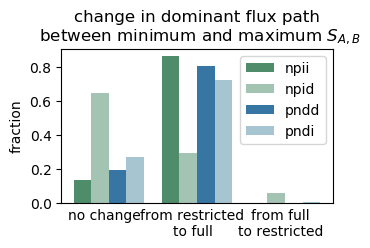

In [7]:
fig,ax=plt.subplots(1,1,figsize=(3.5,2))
keys=["npii","npid","pndd","pndi"]
colors=["#4f8c69","#a3c4b3","#3776a3","#a7c4d1"]
#colors=[colors[0],colors[2]]
for k,key in enumerate(keys):
    ar=dp_types[key]
    #print(key)
    len_=len(ar)
    print(key, len_)
    c1=ar.count(0)/len_
    c2=ar.count(1)/len_
    c3=ar.count(-1)/len_
    print("same: %g, transition to whole graph:%g, from whole to restricted:%g"%(c1,c2,c3))
    ax.bar([0+0.8*k,len(keys)+0.8*k,2*len(keys)+0.8*k],[c1,c2,c3],label=key,color=colors[k])
ax.set_xticks([0.5*len(keys)/2,len(keys)+0.5*len(keys)/2,2*len(keys)+0.5*len(keys)/2])
ax.set_title("change in dominant flux path\n between minimum and maximum $S_{A,B}$",fontsize=12)
ax.tick_params(axis="x",length=0)
ax.set_xticklabels(["no change", "from restricted\nto full", "from full\nto restricted"],fontsize=10)
ax.set_ylabel("fraction")
ax.legend(fontsize=10)
#plt.savefig("../figs/changedominantp.svg",bbox_inches="tight")
plt.show()
